# Machine Learning Pipeline - Data Analysis

En los siguientes cuadernos, repasaremos la implementación de cada uno de los pasos en el Pipeline de Aprendizaje Automático.

Discutiremos:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring


Usaremos el conjunto de datos de precios de viviendas disponible en [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Consulta a continuación para más detalles.

===================================================================================================

## Predicción del Precio de Venta de Casas

El objetivo del proyecto es construir un modelo de aprendizaje automático para predecir el precio de venta de viviendas basado en diferentes variables explicativas que describen aspectos de las casas residenciales.


### ¿Por qué es esto importante?

Predecir los precios de las viviendas es útil para identificar inversiones fructíferas o para determinar si el precio anunciado de una casa está sobreestimado o subestimado.


### ¿Cuál es el objetivo del modelo de aprendizaje automático?

Nuestro objetivo es minimizar la diferencia entre el precio real y el precio estimado por nuestro modelo. Evaluaremos el rendimiento del modelo con el:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).


### ¿Cómo descargo el conjunto de datos?

- Visita [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Desplázate hacia la parte inferior de la página, haz clic en el enlace **'train.csv'**, y luego haz clic en el botón azul 'descargar' hacia la derecha de la pantalla para descargar el conjunto de datos.

- El archivo se descargará con el nombre de **'test.csv'** y guárdalo en el directorio junto con los cuadernos.



**Notas:**

-  Necesitas estar conectado a Kaggle para poder descargar los conjuntos de datos.
-  Necesitas aceptar los términos y condiciones de la competencia para poder descargar el conjunto de datos.

# Data Analysis

Vamos a proceder a cargar el conjunto de datos.

In [182]:
# para manejar conjuntos de datos
import pandas as pd
import numpy as np

# para ploteo
import matplotlib.pyplot as plt
import seaborn as sns

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

In [ ]:
#pip install pyarrow fastparquet


In [207]:
data = pd.read_parquet('../data_full_raw.parquet')
# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(856608, 71)


,DNI,BASE,CELULAR1,CELULAR2,CELULAR3,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,MARCA_LABORAL,DEPARTAMENTO,PROVINCIA,DISTRITO_INEI,LIMAS,PROPENSION,PLD_NACION,PLD_BCP,PLD_BBVA,PLD_SAGA,PLD_SCOTIA,PLD_C_HUANCAYO,PLD_CREDISCOTIA,PLD_INTERBANK,PLD_C_AREQUIPA,PLD_C_CUSCO,PLD_MIBANCO,PLD_RIPLEY,PLD_C_PIURA,PLD_EFECTIVA,PLD_PICHINCHA,PLD_CONFIANZA,TC_BCP,TC_SAGA,TC_INTERBANK,TC_BBVA,TC_OH,TC_RIPLEY,TC_SCOTIA,TC_CREDISCOTIA,TC_PICHINCHA,TC_CENCOSUD,MENSAJE_TASA,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,MENSAJE_VARIACION,ULTIMA_AGRUPACION,ULTIMO_RESULTADO,ULTIMO_MOTIVO,RANGO_RCI,ESTADO_CIVIL,GENERO,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target
0,0,2025_01,944256646,941892836,None,7400.0,0.799,8700.0,0.799,8700.0,0.799,8700.0,0.799,38.0,2.DEPEN+INDEPEN,LIMA,LIMA,LOS OLIVOS,LIMA NORTE,PROPENSION 2,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,NUEVA OFERTA,NO CONTACTO,VOLVER A INTENTAR,BUZON,"1. <0%,10%>",Casado,M,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2025_01,952918805,952918808,967905361,9900.0,0.780,13100.0,0.780,15500.0,0.780,18600.0,0.780,62.0,4.INFORMAL,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,FUERA DE LIMA,PROPENSION 1,20998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS MEDIANOS,CON MAS OFERTA Y MENOS TASA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"3. [20%,30%>",Casado,M,0.0,NaN,4.0,240.0,1.0,1.0,NO CONTACTO,228.0,0.0,0.0,240.0,0.0,12.0,1.0,0.0
2,2,2025_01,954651500,954651840,None,6900.0,0.650,9300.0,0.650,11200.0,0.650,11900.0,0.650,49.0,3.INDEPENDIENTE,CALLAO,CALLAO,BELLAVISTA,CALLAO,PROPENSION 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1627.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS MEDIANOS,MISMA OFERTA Y MAS TASA,NO CONTACTO,VOLVER A INTENTAR,SE CORTA LLAMADA SIN MOTIVO,"2. [10%,20%>",Soltero,F,0.0,NaN,2.0,41.0,1.0,0.0,CONTACTO NO EFECTIVO,31.0,0.0,0.0,41.0,0.0,10.0,1.0,0.0
3,3,2025_01,986354919,942159204,None,4000.0,0.650,5400.0,0.650,6500.0,0.650,8000.0,0.650,48.0,2.DEPEN+INDEPEN,ANCASH,SANTA,NUEVO CHIMBOTE,FUERA DE LIMA,PROPENSION 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,None,SIN DEUDA CONSUMO,MENOS OFERTA Y MISMA TASA,NO CONTACTO,NO CONTACTO MAQUINA,Comunica,"4. [30%,60%]",Casado,M,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2025_01,None,None,None,4200.0,0.799,5500.0,0.799,5500.0,0.799,5500.0,0.799,52.0,4.INFORMAL,ANCASH,HUARAZ,HUARAZ,FUERA DE LIMA,PROPENSION 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,None,SIN DEUDA CONSUMO,MISMA OFERTA Y MISMA TASA,CONTACTO NO EFECTIVO,NEGATIVO,SIN REBATE - NO INTERESADO CORTA LLAMADA,"1. <0%,10%>",Casado,M,0.0,NaN,17.0,69.0,2.0,5.0,CONTACTO NO EFECTIVO,59.0,0.0,0.0,55.0,0.0,6.0,1.0,0.0


In [169]:
data_train = data[data["BASE"]!='2025_01'].reset_index(drop=True)
data_test = data[data["BASE"]=='2025_01'].reset_index(drop=True)

In [170]:
data_train.to_parquet('../data/train.parquet')
data_test.to_parquet('../data/test.parquet')

In [171]:
data = data_train.copy()

In [13]:
bancos_comerciales_pld = ["PLD_BCP", "PLD_BBVA", "PLD_SCOTIA", "PLD_INTERBANK", "PLD_PICHINCHA","PLD_NACION"]
bancos_comerciales_tc = ["TC_BCP", "TC_BBVA", "TC_SCOTIA", "TC_INTERBANK", "TC_PICHINCHA"]

cajas_ahorro_pld = ["PLD_C_HUANCAYO", "PLD_C_AREQUIPA", "PLD_C_CUSCO", "PLD_C_PIURA", "PLD_EFECTIVA", "PLD_CONFIANZA"]
cajas_ahorro_tc = []  # No hay TC en cajas de ahorro

retail_financieras_pld = ["PLD_SAGA", "PLD_RIPLEY", "PLD_CREDISCOTIA", "PLD_MIBANCO"]
retail_financieras_tc = ["TC_SAGA", "TC_RIPLEY", "TC_CENCOSUD", "TC_OH", "TC_CREDISCOTIA"]

pld_columns = bancos_comerciales_pld + cajas_ahorro_pld + retail_financieras_pld
tc_columns = bancos_comerciales_tc + cajas_ahorro_tc + retail_financieras_tc

col_drop = tc_columns + pld_columns


In [19]:
# Calcular total de deuda y cantidad de entidades con deuda distinta de 0
data["Bancos_PLD_Total"] = data[bancos_comerciales_pld].sum(axis=1)
data["Cajas_PLD_Total"] = data[cajas_ahorro_pld].sum(axis=1)
data["Retail_PLD_Total"] = data[retail_financieras_pld].sum(axis=1)
data["PLD_Total"] = data[pld_columns].sum(axis=1)

data["Bancos_TC_Total"] = data[bancos_comerciales_tc].sum(axis=1)
data["Retail_TC_Total"] = data[retail_financieras_tc].sum(axis=1)
data["TC_Total"] = data[tc_columns].sum(axis=1)


data["Bancos_PLD_Entidades"] = (data[bancos_comerciales_pld] != 0).sum(axis=1)
data["Cajas_PLD_Entidades"] = (data[cajas_ahorro_pld] != 0).sum(axis=1)
data["Retail_PLD_Entidades"] = (data[retail_financieras_pld] != 0).sum(axis=1)
data["PLD_Entidades"] = (data[pld_columns] != 0).sum(axis=1)


data["Bancos_TC_Entidades"] = (data[bancos_comerciales_tc] != 0).sum(axis=1)
data["Retail_TC_Entidades"] = (data[retail_financieras_tc] != 0).sum(axis=1)
data["TC_Entidades"] = (data[tc_columns] != 0).sum(axis=1)


data.drop(columns = col_drop , inplace=True)

In [22]:
data["CANTIDAD_CELULARES"]=data[[x for x in data.columns if "CEL" in x]].notna().sum(axis=1)

In [23]:
data = data[data.BASE.isin(sorted(data.BASE.unique())[-3:])]

In [24]:
# Eliminamos Id, ya que es solo un numero para identificar cada casa
data.drop(["DNI","BASE","CELULAR1","CELULAR2","CELULAR3"], axis=1, inplace=True)

data.shape

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\2326730968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["DNI","BASE","CELULAR1","CELULAR2","CELULAR3"], axis=1, inplace=True)


(211500, 55)

In [82]:
data["TC_Entidades_Mas3"] = data.TC_Entidades.map( lambda x : 1 if x > 3 else 0)
data["Tiene_Deuda_PLD"] = data.PLD_Entidades.map( lambda x : 1 if x > 0 else 0)


C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\991602021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["TC_Entidades_Mas3"] = data.TC_Entidades.map( lambda x : 1 if x > 3 else 0)
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\991602021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tiene_Deuda_PLD"] = data.PLD_Entidades.map( lambda x : 1 if x > 0 else 0)


In [83]:
data.head(2)

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,MARCA_LABORAL,DEPARTAMENTO,PROVINCIA,DISTRITO_INEI,LIMAS,PROPENSION,MENSAJE_TASA,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,MENSAJE_VARIACION,ULTIMA_AGRUPACION,ULTIMO_RESULTADO,ULTIMO_MOTIVO,RANGO_RCI,ESTADO_CIVIL,GENERO,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,Tiene_Deuda_Bancos_PLD,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,2.DEPEN+INDEPEN,LIMA,LIMA,LOS OLIVOS,LIMA NORTE,PROPENSION 2,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,MISMA OFERTA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"1. <0%,10%>",Soltero,F,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,2.DEPEN+INDEPEN,LIMA,LIMA,BREÑA,LIMA CENTRO,PROPENSION 2,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,CON MAS OFERTA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"1. <0%,10%>",Soltero,F,0.0,NaN,NaN,10.0,1.0,33.0,NO CONTACTO,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0,0


El conjunto de datos de precios de casas contiene 1460 filas, es decir, casas, y 80 columnas, es decir, variables.

79 son variables predictivas y 1 es la variable objetivo: SalePrice

## Analysis

**Analizaremos lo siguiente:**

1. La variable objetivo (The target variable)
2. Tipos de variables (categóricas y numéricas)
3. Datos faltantes (Missing data)
4. Variables numéricas
    - Discretas
    - Continuas
    - Distribuciones
    - Transformaciones

5. Variables Categóricas
    - Cardinalidad
    - Etiquetas Raras
    - Mapeos Especiales
    
6. Recursos adicionales de Lectura

## Target

Comencemos explorando la distribución del objetivo.

In [84]:
data["target"].value_counts()

target
0.0    210940
1.0       560
Name: count, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211500 entries, 555108 to 766607
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   12M_MONTO                       211500 non-null  float64
 1   12M_TASA                        211500 non-null  float64
 2   18M_MONTO                       211500 non-null  float64
 3   18M_TASA                        211500 non-null  float64
 4   24M_MONTO                       211500 non-null  float64
 5   24M_TASA                        211500 non-null  float64
 6   36M_MONTO                       211500 non-null  float64
 7   36M_TASA                        211500 non-null  float64
 8   EDAD                            211500 non-null  float64
 9   MARCA_LABORAL                   211500 non-null  object 
 10  DEPARTAMENTO                    211500 non-null  object 
 11  PROVINCIA                       211500 non-null  object 
 12  DISTRITO_INEI   

In [28]:
data["target"].value_counts(normalize=True)

target
0.0    0.997352
1.0    0.002648
Name: proportion, dtype: float64

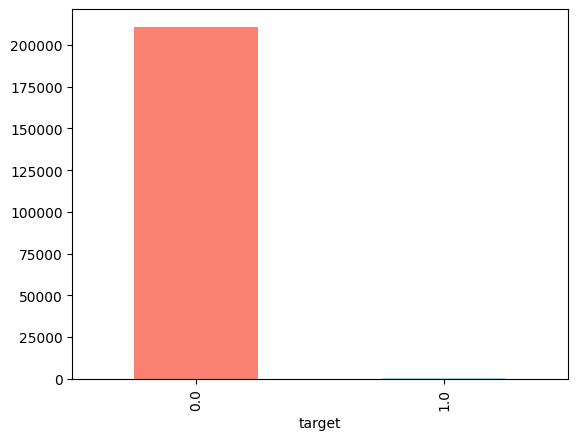

In [29]:
data["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Podemos ver que el objetivo es continuo y que la distribución está sesgada hacia la derecha.

Podemos mejorar la dispersión de los valores con una transformación matemática.

Ahora la distribución luce más Gaussiana

## Variable Types

A continuación, identifiquemos las variables categóricas y numéricas.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211500 entries, 555108 to 766607
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   12M_MONTO                       211500 non-null  float64
 1   12M_TASA                        211500 non-null  float64
 2   18M_MONTO                       211500 non-null  float64
 3   18M_TASA                        211500 non-null  float64
 4   24M_MONTO                       211500 non-null  float64
 5   24M_TASA                        211500 non-null  float64
 6   36M_MONTO                       211500 non-null  float64
 7   36M_TASA                        211500 non-null  float64
 8   EDAD                            211500 non-null  float64
 9   MARCA_LABORAL                   211500 non-null  object 
 10  DEPARTAMENTO                    211500 non-null  object 
 11  PROVINCIA                       211500 non-null  object 
 12  DISTRITO_INEI   

In [85]:
# identifiquemos las variables categóricas
# capturaremos aquellas de tipo *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# agreguemos MSSubClass a la lista de variables categóricas
len(cat_vars)

17

In [180]:
[var for var in data.columns if data[var].dtype == 'O']

['DNI',
 'BASE',
 'CELULAR1',
 'CELULAR2',
 'CELULAR3',
 'MARCA_LABORAL',
 'DEPARTAMENTO',
 'PROVINCIA',
 'DISTRITO_INEI',
 'LIMAS',
 'PROPENSION',
 'MENSAJE_TASA',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'MENSAJE_VARIACION',
 'ULTIMA_AGRUPACION',
 'ULTIMO_RESULTADO',
 'ULTIMO_MOTIVO',
 'RANGO_RCI',
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion']

In [86]:
# ahora identifiquemos las variables numéricas

num_vars = [
    var for var in data.columns if var not in cat_vars 
]

# Numero de Variables Categóricas
len(num_vars)

41

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [87]:
# Hacemos una lista de las variables que contienen Missing Values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determina el porcentaje de missing values (expresado en decimales)
# y muestra el resultado ordenado por % de Missing Data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

tiempo_desde_ultima_conversion    0.999948
tiempo_desde_ultima_negacion      0.920988
intentos_totales                  0.666619
dias_ultima_gestion               0.666619
veces_respuesta_positiva          0.666619
max_intentos_en_un_mes            0.666619
promedio_dias_entre_gestiones     0.666619
veces_solicitud_seguimiento       0.666619
veces_sin_respuesta               0.666619
veces_respuesta_negativa          0.666619
meses_gestionados                 0.666619
veces_acepto_producto             0.666619
COMPETITIVIDAD                    0.529154
ULTIMA_AGRUPACION                 0.232563
ULTIMO_MOTIVO                     0.232563
ULTIMO_RESULTADO                  0.232563
GENERO                            0.000095
dtype: float64

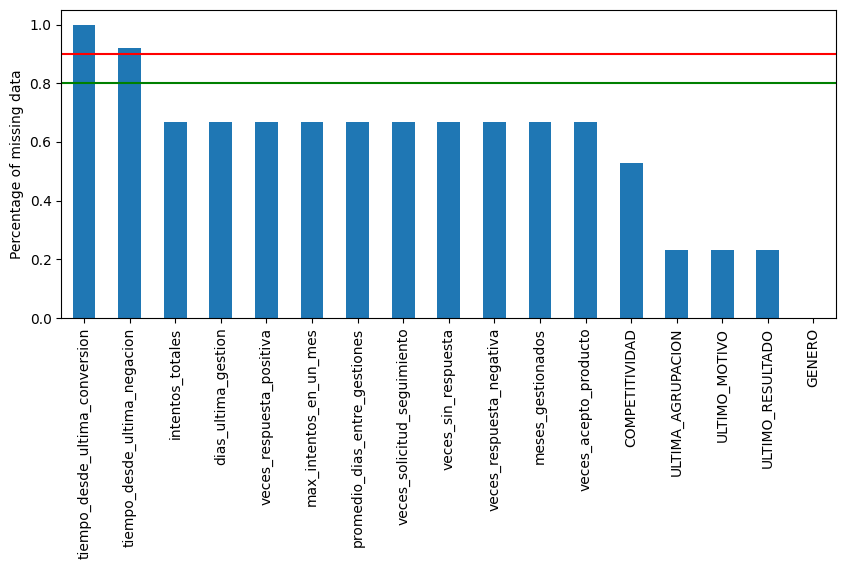

In [88]:
# plot
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [179]:
# Ahora podemos determinar cuáles variables, de aquellas con datos faltantes,
# son numéricas y cuáles son categóricas

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Numero de Variables Categóricas con na: ', len(cat_na))
print('Numero de Variables Numéricas con na: ', len(num_na))

TypeError: 'int' object is not iterable

In [178]:
len(cat_vars)

13

## Relación entre los Missing Values y el Precio de Venta

Evaluemos el precio de la casa en aquellas observaciones donde falta información. Haremos esto para cada variable que muestre datos faltantes.

In [90]:
def analyse_na_value(df, var):
    df = df.copy()

    # Crear una variable que indica si el valor está ausente (1) o presente (0)
    df[var] = np.where(df[var].isnull(), "Nulo", "No Nulo")

    # Crear subgráficos con ejes Y compartidos
    fig, ax = plt.subplots(1, 2, figsize=(8,2), sharey=True)  # Compartir el eje Y

    df[df["target"] == 0].sort_values(var)[var].value_counts(normalize=True,sort=False).plot(kind="bar", ax=ax[0], color="red", alpha=0.7)
    ax[0].set_title("Distribución en No Aceptan")

    df[df["target"] == 1].sort_values(var)[var].value_counts(normalize=True,sort=False).plot(kind="bar", ax=ax[1], color="green", alpha=0.7)
    ax[1].set_title("Distribución en Aceptan")

    plt.show()


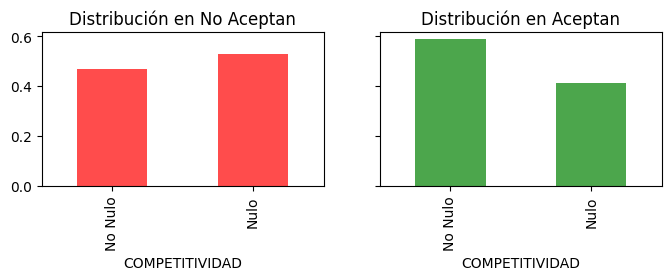

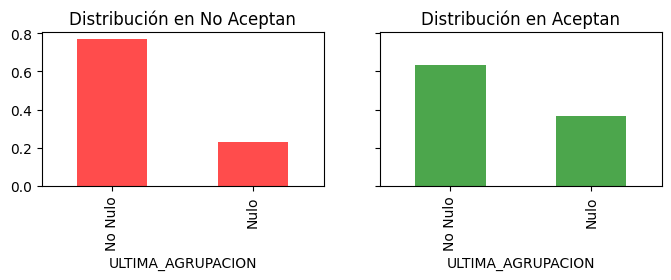

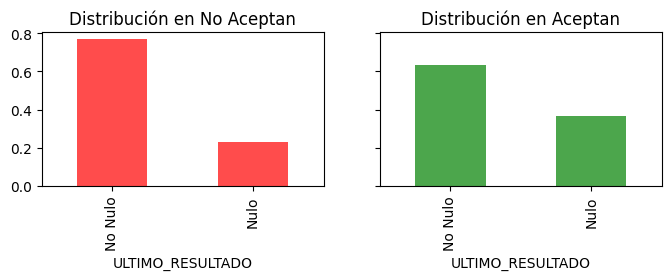

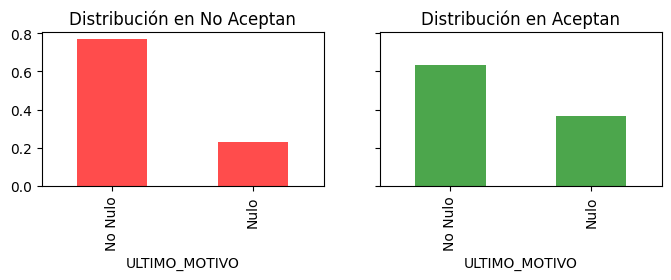

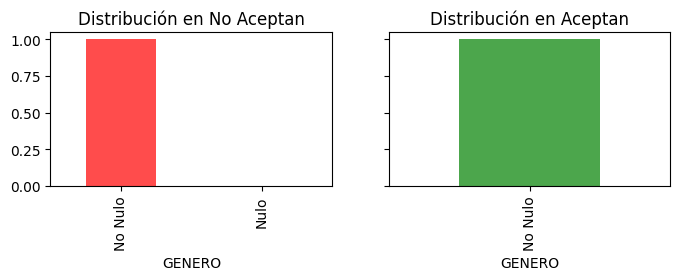

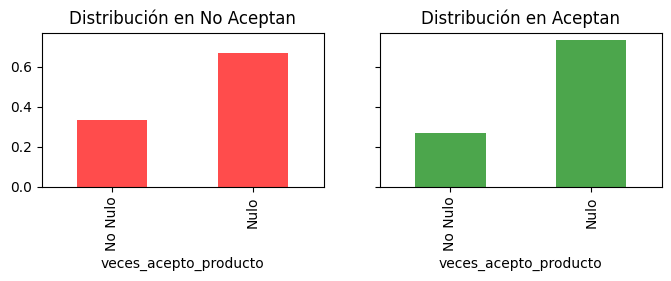

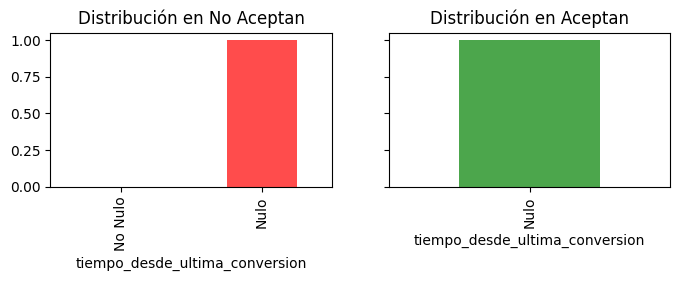

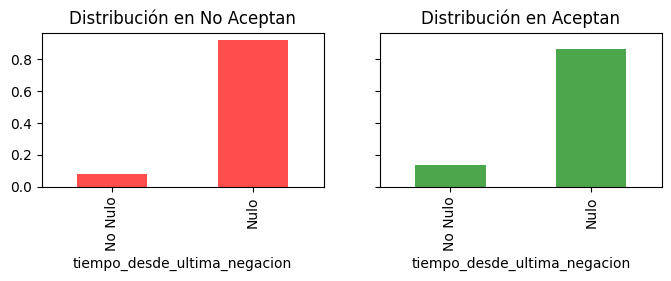

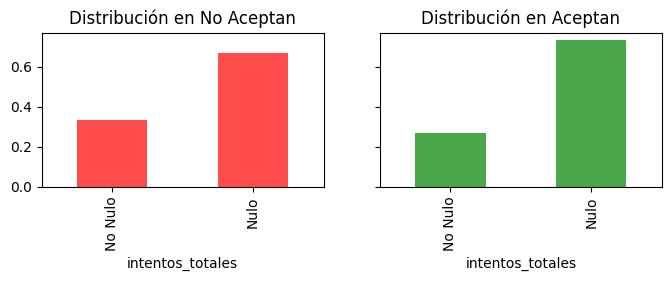

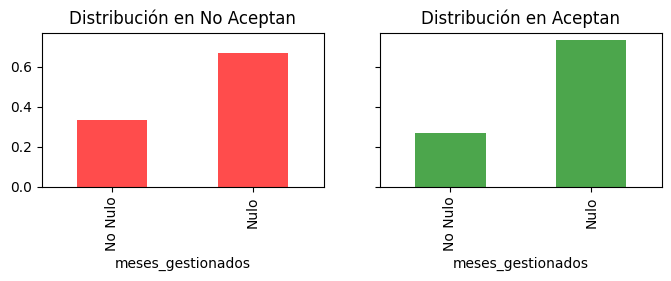

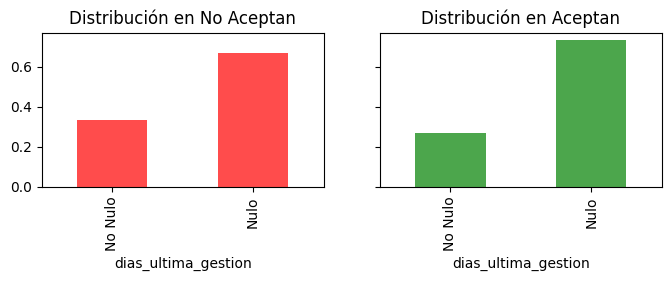

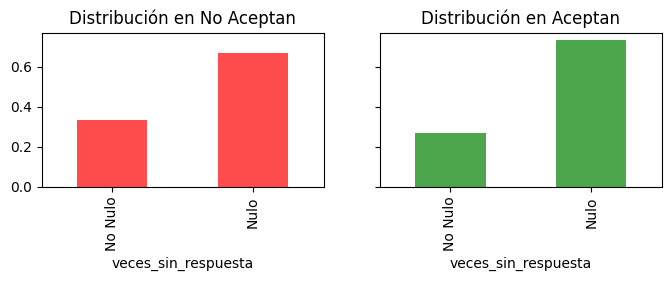

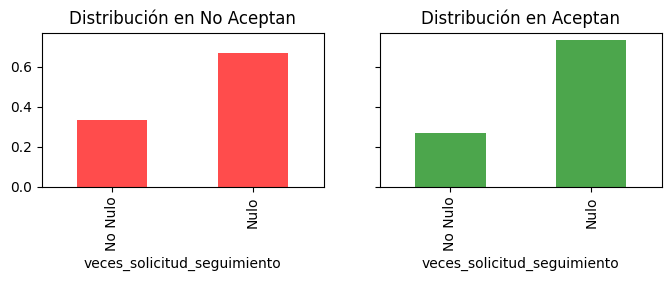

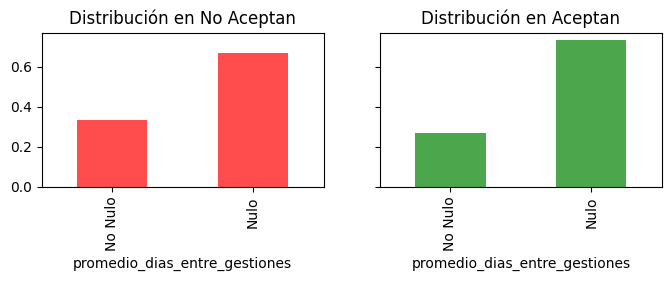

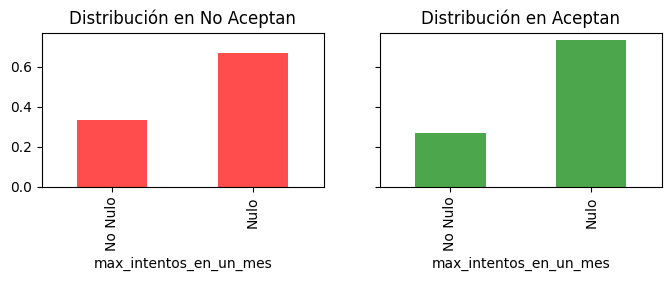

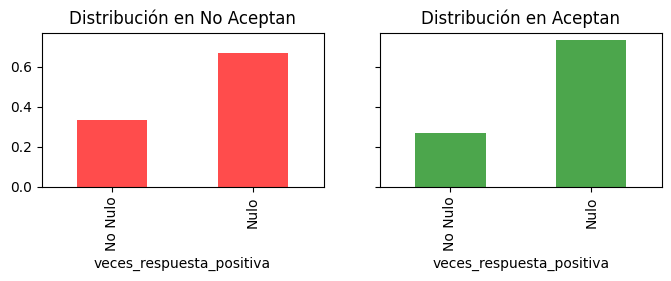

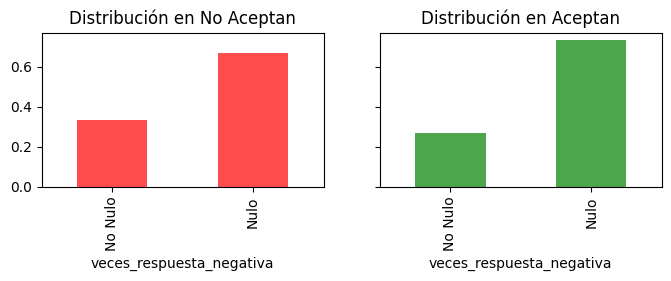

In [91]:
# ejecutemos la función en cada variable con datos faltantes
for var in vars_with_na:
    analyse_na_value(data, var)

# Numerical variables

Vamos a identificar qué variables numéricas tenemos en el conjunto de datos.

In [92]:
data.select_dtypes(["float","int"]).head(2)

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,Tiene_Deuda_Bancos_PLD,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,0.0,NaN,NaN,10.0,1.0,33.0,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0,0


In [93]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  41


,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,Tiene_Deuda_Bancos_PLD,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,0.0,NaN,NaN,10.0,1.0,33.0,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0,0
555110,9200.0,0.720,10400.0,0.720,10400.0,0.720,10400.0,0.720,36.0,0.0,NaN,NaN,8.0,1.0,34.0,8.0,0.0,3.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,133.0,0,0,0,0,1,0,1,2,0,0,0
555111,5000.0,0.799,6700.0,0.799,8000.0,0.799,9700.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2545.0,2545.0,4488.0,1279.0,5767.0,0,0,1,1,1,1,2,2,0,0,1
555112,7400.0,0.799,9900.0,0.799,11800.0,0.799,12400.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14032.0,0.0,0.0,14032.0,200.0,68.0,268.0,1,0,0,1,1,1,2,1,0,0,1


Vemos que hay una tendencia a una disminución en el precio con las casas más antiguas. En otras palabras, cuanto más tiempo haya entre la construcción o remodelación de la casa y la fecha de venta, menor será el precio de venta.

Lo cual tiene sentido, ya que esto significa que la casa tendrá una apariencia más antigua y potencialmente necesitará reparaciones.

## Discrete variables

Vamos a identificar cuáles variables son discretas, es decir, muestran un número finito de valores.

In [94]:
# hagamos una lista de variables discretas
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Numero de Variables Discretas: ', len(discrete_vars))

Numero de Variables Discretas:  18


In [95]:
# Visualizamos las Variables Discretas

data[discrete_vars].head()

,veces_acepto_producto,tiempo_desde_ultima_conversion,meses_gestionados,veces_solicitud_seguimiento,veces_respuesta_positiva,_merge_variables,target,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,Tiene_Deuda_Bancos_PLD,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,1,0,1,1,0,0,0
555109,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,1,1,0,0,0
555110,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,1,2,0,0,0
555111,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,1,1,1,1,2,2,0,0,1
555112,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0,0,1,1,1,2,1,0,0,1


Estas variables discretas tienden a ser calificaciones (Qual) o escalas de evaluación (Cond), o se refieren al número de habitaciones, o unidades (FullBath, GarageCars), o indican el área de la habitación (KitchenAbvGr).

Esperamos precios más altos con números más grandes.

Vamos a analizar su contribución al precio de la casa.

MoSold es el mes en que la casa fue vendida.

In [96]:
data.target.value_counts()

target
0.0    210940
1.0       560
Name: count, dtype: int64

In [97]:
from collections import Counter
import pandas as pd

def balanced_resampling(data,fact =  0.5 , replace=True):
    # Contar la cantidad de muestras por clase
    n_class_0 = data.target.value_counts().max()
    
    if replace:
        target_0 = data.query("target == 0 ").sample(n = round(n_class_0 *fact ) , replace=False)
        target_1 = data.query("target == 1 ").sample(n = target_0.shape[0] , replace=replace)
    else:
        target_1 = data.query("target == 1 ")
        target_0 = data.query("target == 0 ").sample(n = target_1.shape[0] , replace=False)
    df_balanced = pd.concat([target_0 , target_1])
    

    print("Distribución después del balanceo:", Counter(df_balanced["target"]))
    return df_balanced

# Aplicar la función


In [98]:
import matplotlib.pyplot as plt

def barras_apiladas_target(df1, df2, var, nombres):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)  # Crear figura con 2 gráficos en una fila

    # Definir colores personalizados para cada categoría del target
    colores = ["orange", "green"]  # 0 = No aceptó producto, 1 = Aceptó producto

    # Iterar sobre los DataFrames
    for i, (df, nombre, ax) in enumerate(zip([df1, df2], nombres, axes)):
        # Calcular la tabla de porcentajes
        freq_table = df.groupby([var, "target"]).size().unstack().fillna(0)  # Evitar NaN
        freq_table_perc = freq_table.div(freq_table.sum(axis=1), axis=0) * 100  # Convertir a porcentaje
        # Graficar con las categorías en el eje Y y la target como leyenda
        freq_table_perc.plot(kind="barh", stacked=True, color=colores, edgecolor="black", ax=ax, width=0.7)

        # Añadir etiquetas con los porcentajes en las barras
        for p in ax.patches:
            width = p.get_width()  # Valor del porcentaje
            if width > 0:  # Evitar etiquetas en valores 0
                ax.annotate(f'{width:.2f}%', 
                            (p.get_x() + width / 2, p.get_y() + p.get_height() / 2), 
                            ha='center', fontsize=10, color='black')

        ax.set_title(f"{nombre}: Distribución del Target por {var} (%)")
        ax.set_xlabel("Porcentaje")
        ax.set_ylabel(var)  # Ahora el eje Y es la variable independiente
        ax.legend(["No aceptó producto", "Aceptó producto"], title="Target")

    plt.tight_layout()
    plt.show()

# Uso de la función con dos dataframes


In [99]:
df_balanced = balanced_resampling(data, fact =  1, replace=True)


Distribución después del balanceo: Counter({0.0: 210940, 1.0: 210940})


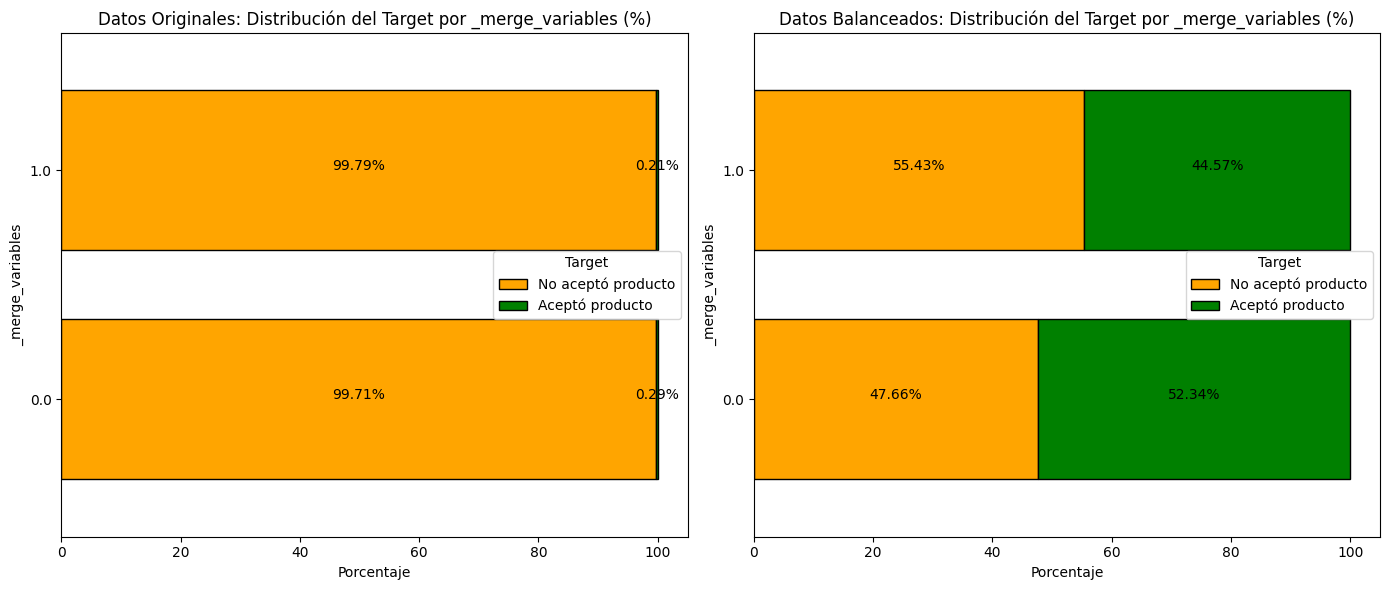

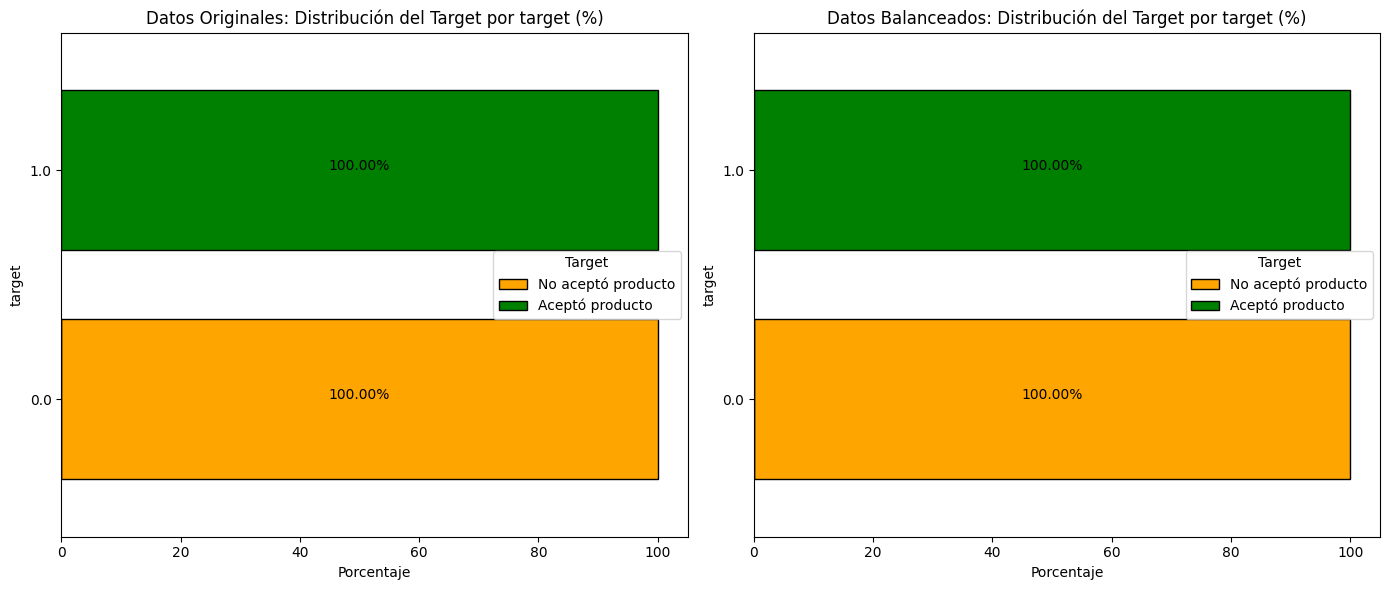

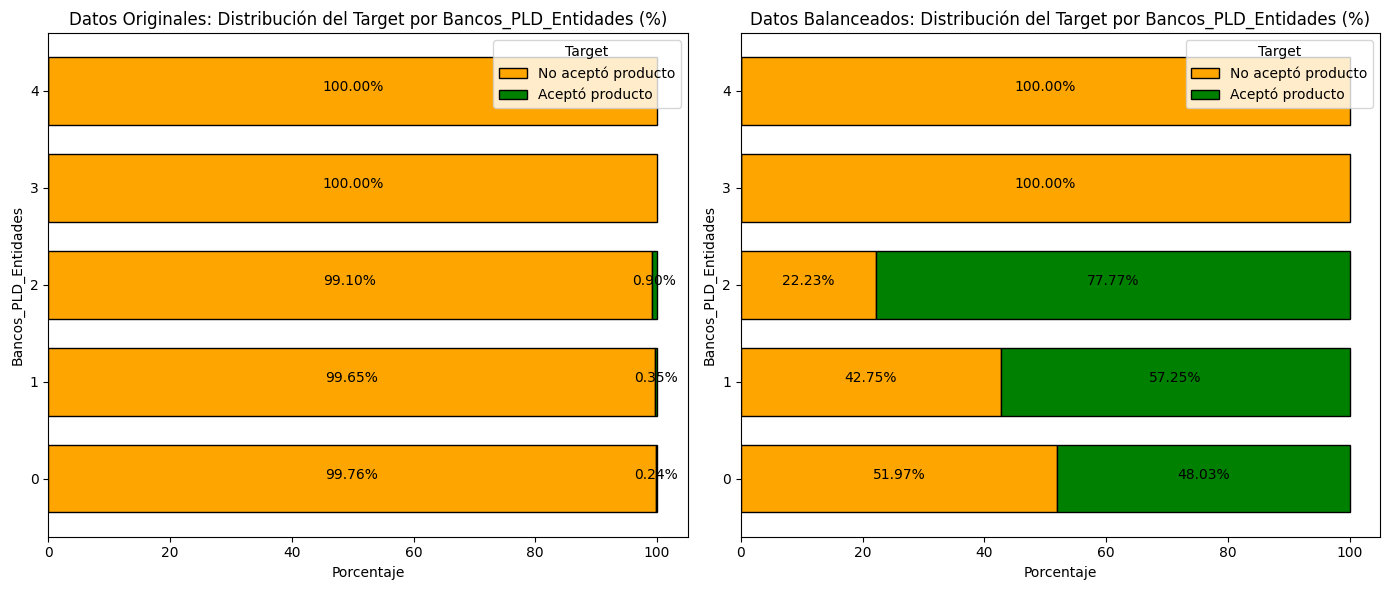

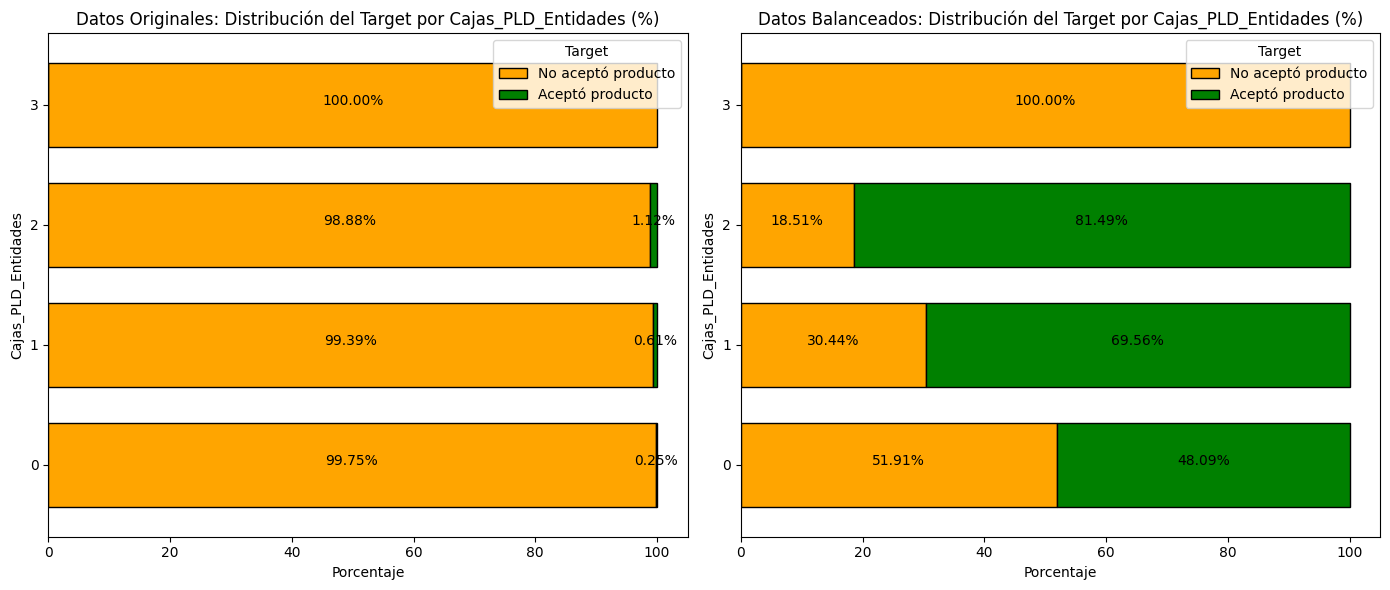

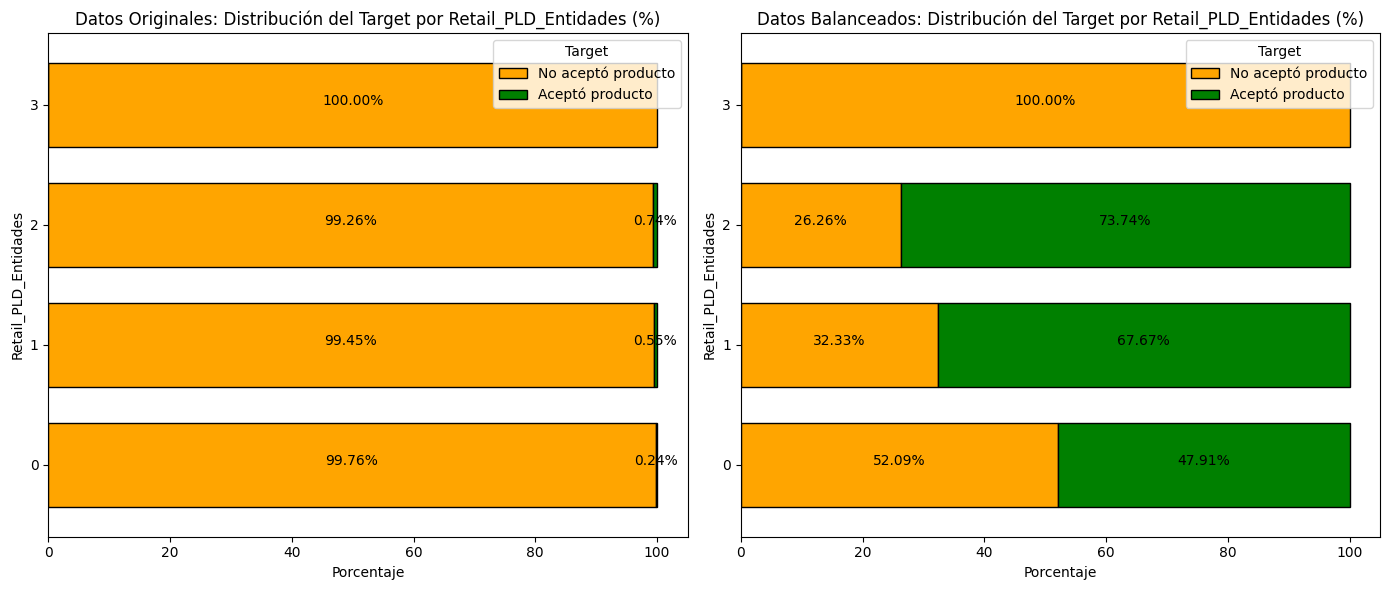

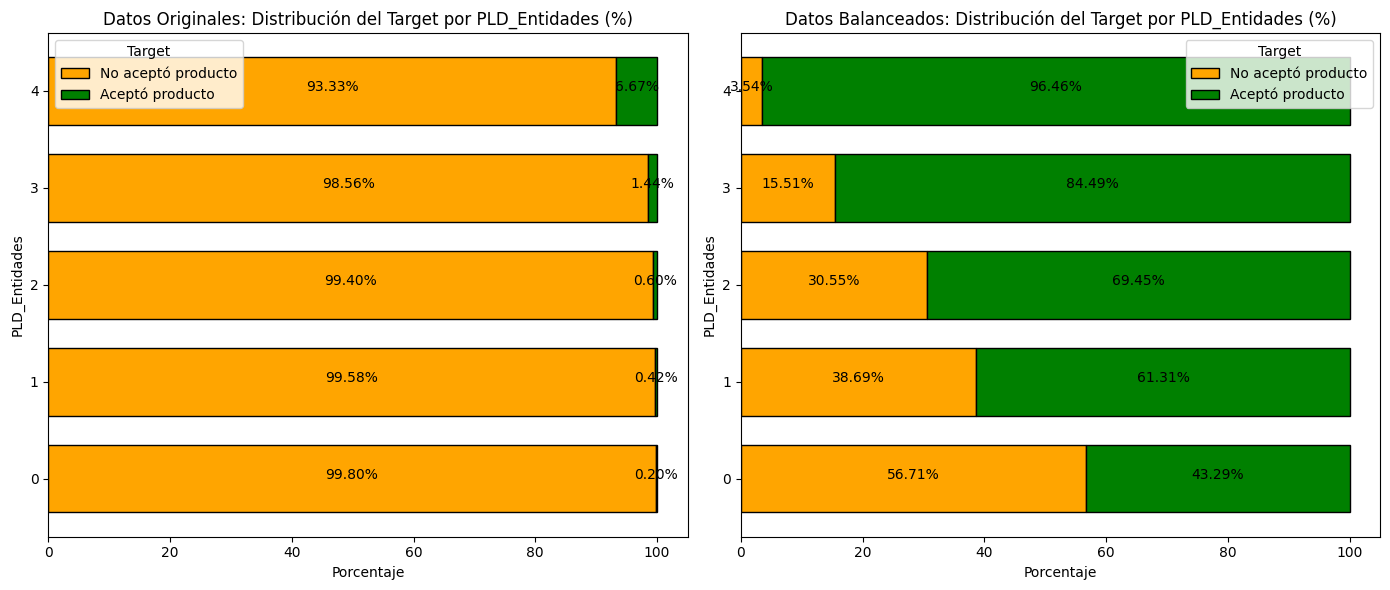

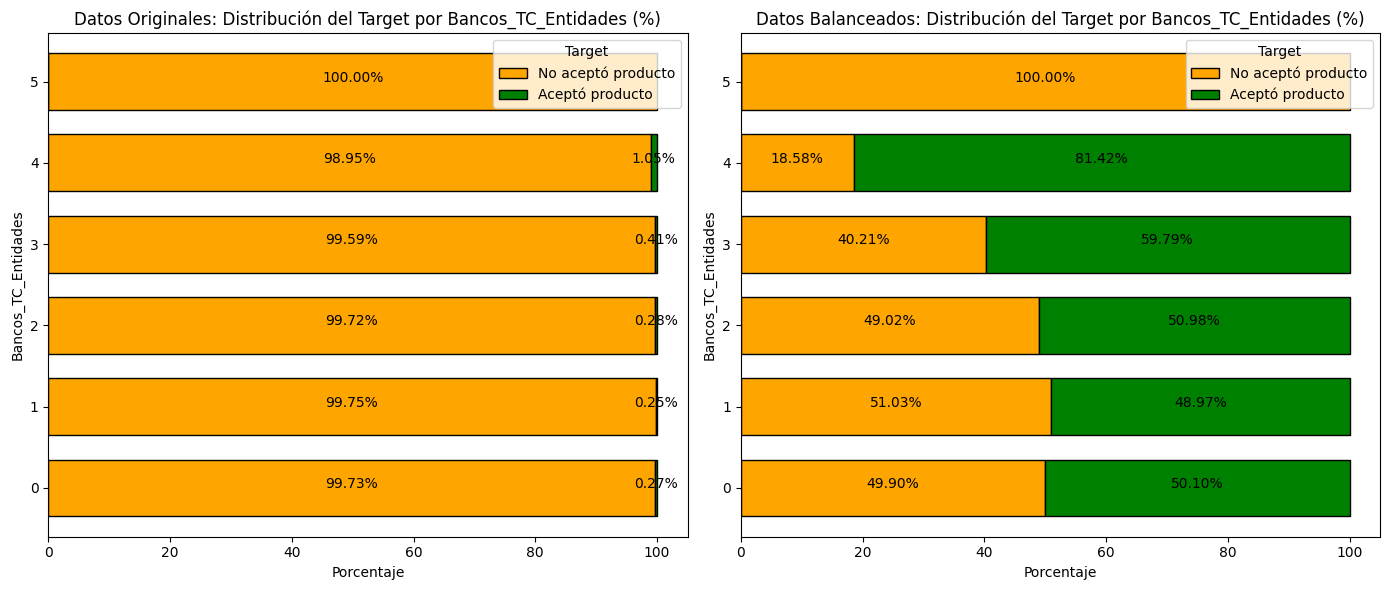

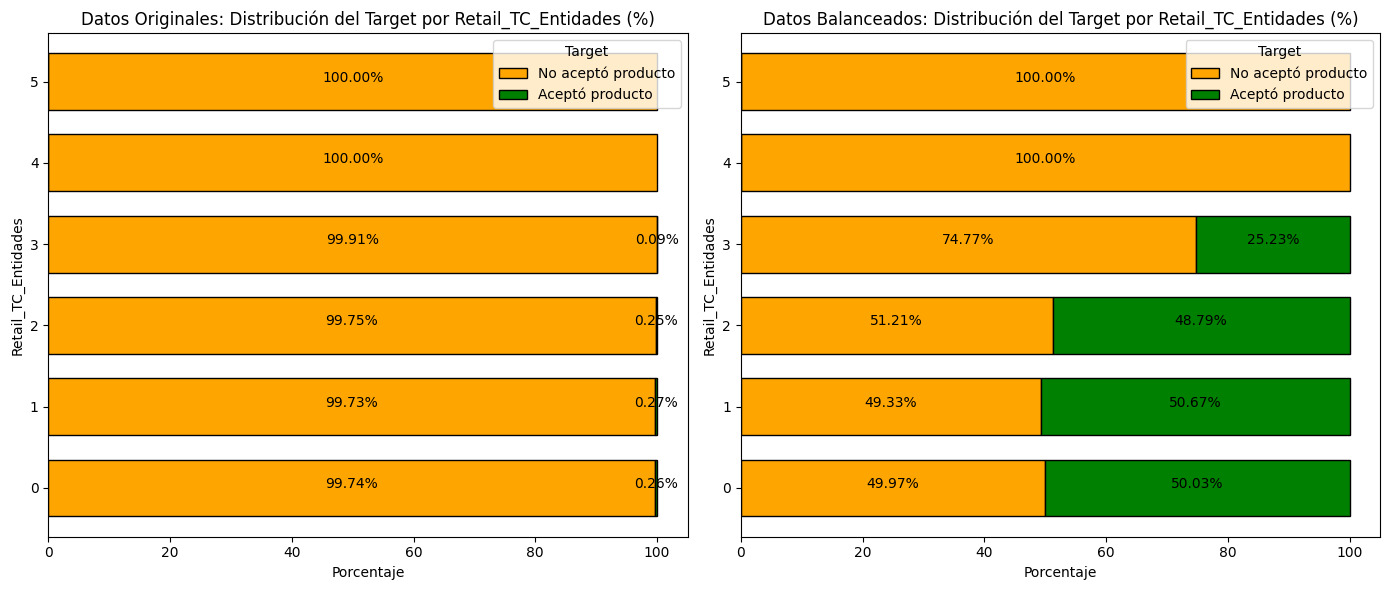

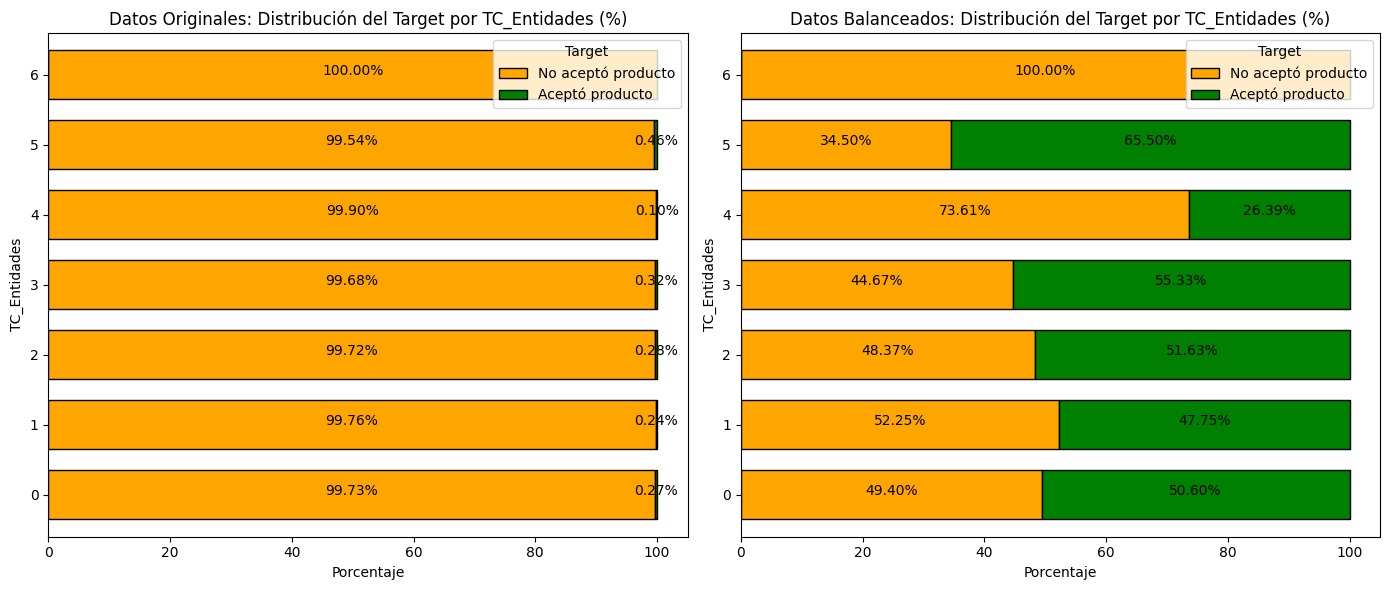

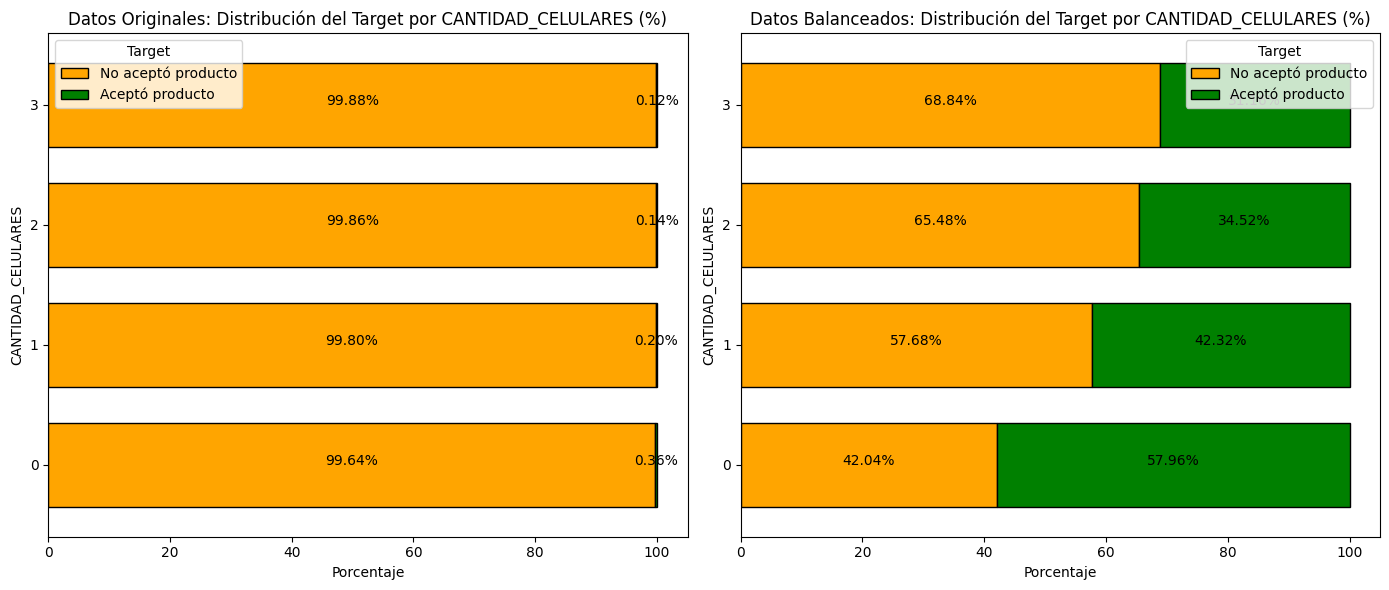

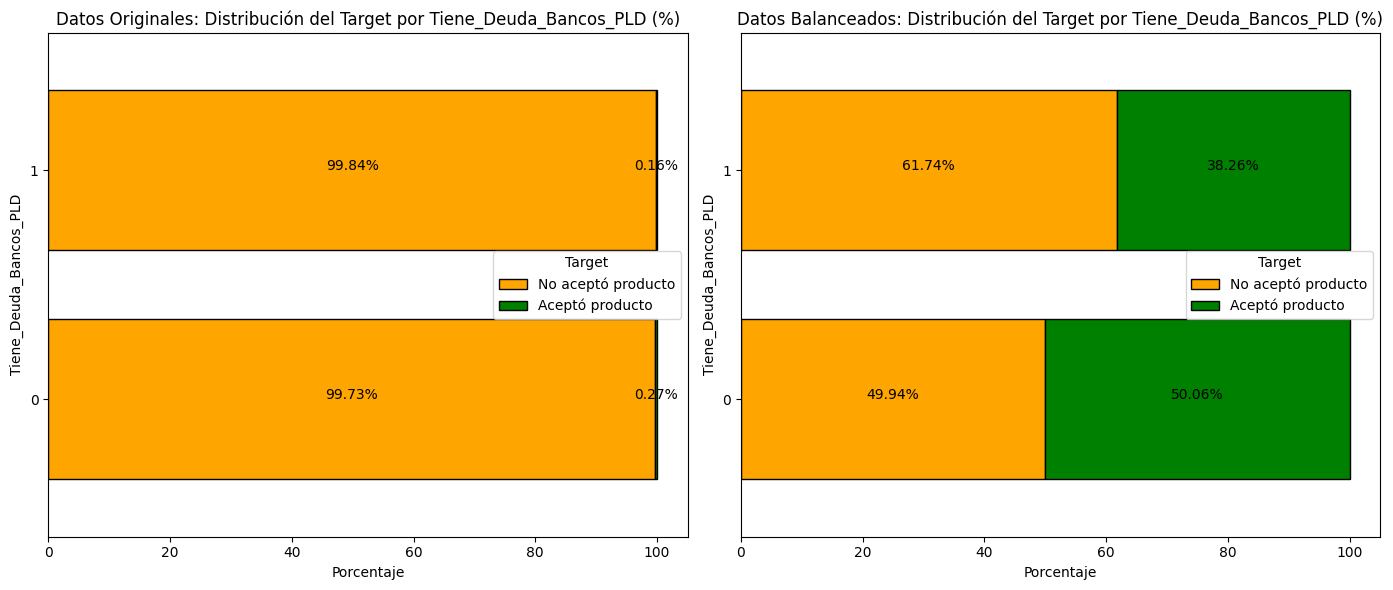

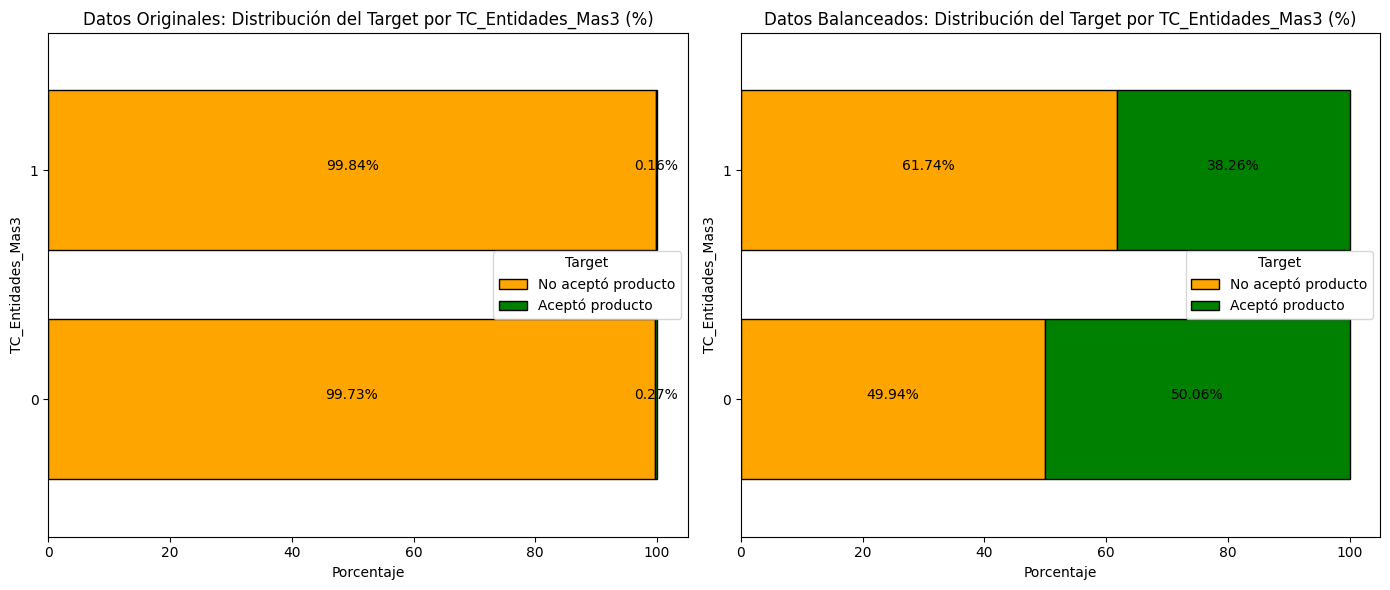

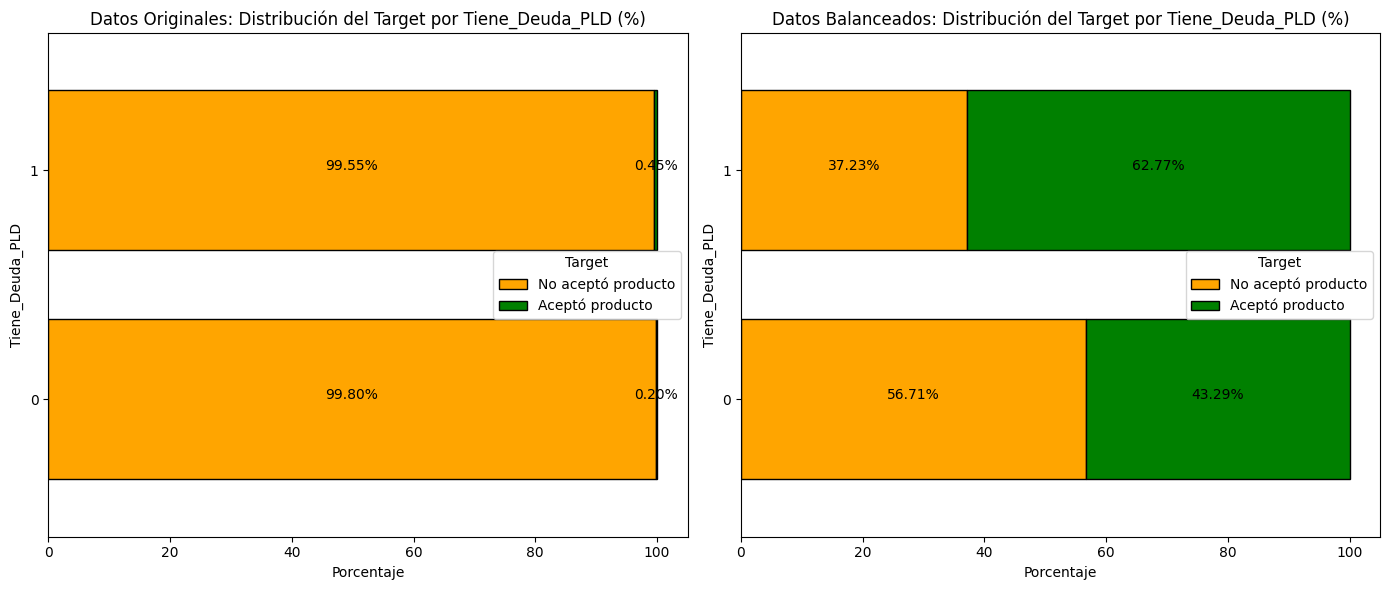

In [100]:
for var in discrete_vars:
    if var not in num_na:
        barras_apiladas_target(data, df_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])


Para la mayoría de las variables numéricas discretas, vemos un aumento en el precio de venta con la calidad, la condición general, el número de habitaciones o la superficie.

Para algunas variables, no vemos esta tendencia. Es probable que esa variable no sea un buen predictor del precio de venta.

## Continuous variables

Vamos a encontrar la distribución de las variables continuas. Consideraremos como variables continuas todas aquellas que no son temporales o discretas.

In [101]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  23


In [102]:
# Visualizamos las Variables Continuas

data[cont_vars].head()

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,tiempo_desde_ultima_negacion,intentos_totales,dias_ultima_gestion,veces_sin_respuesta,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_negativa,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,314.0,0.0,314.0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,NaN,10.0,33.0,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0
555110,9200.0,0.720,10400.0,0.720,10400.0,0.720,10400.0,0.720,36.0,NaN,8.0,34.0,8.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,133.0
555111,5000.0,0.799,6700.0,0.799,8000.0,0.799,9700.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2545.0,2545.0,4488.0,1279.0,5767.0
555112,7400.0,0.799,9900.0,0.799,11800.0,0.799,12400.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14032.0,0.0,0.0,14032.0,200.0,68.0,268.0


In [103]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def generar_transformaciones(df, columna):
    if columna not in df.columns:
        raise ValueError("La columna especificada no existe en el dataframe.")

    variable = df[columna]  # Extraer la columna

    # Crear un nuevo DataFrame con la variable original
    df_trans = pd.DataFrame({columna: variable})

    # Aplicar transformaciones
    df_trans[f"{columna}_log1p"] = np.log1p(variable)  # log(x + 1)
    df_trans[f"{columna}_log"] = np.log(variable + 1)  # log(x + 1) alternativa
    df_trans[f"{columna}_sqrt"] = np.sqrt(variable)  # Raíz cuadrada
    df_trans[f"{columna}_reciproco"] = 1 / (variable + 1)  # Recíproco
    df_trans[f"{columna}_exponencial"] = variable**2  # Cuadrática

    # Transformación log_reflejo (para sesgo negativo)
    df_trans[f"{columna}_log_reflejo"] = np.log(variable.max() + 1 - variable)

    return df_trans


In [109]:
cont_vars

['12M_MONTO',
 '12M_TASA',
 '18M_MONTO',
 '18M_TASA',
 '24M_MONTO',
 '24M_TASA',
 '36M_MONTO',
 '36M_TASA',
 'EDAD',
 'tiempo_desde_ultima_negacion',
 'intentos_totales',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'max_intentos_en_un_mes',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total',
 'TC_Total']

In [ ]:
data

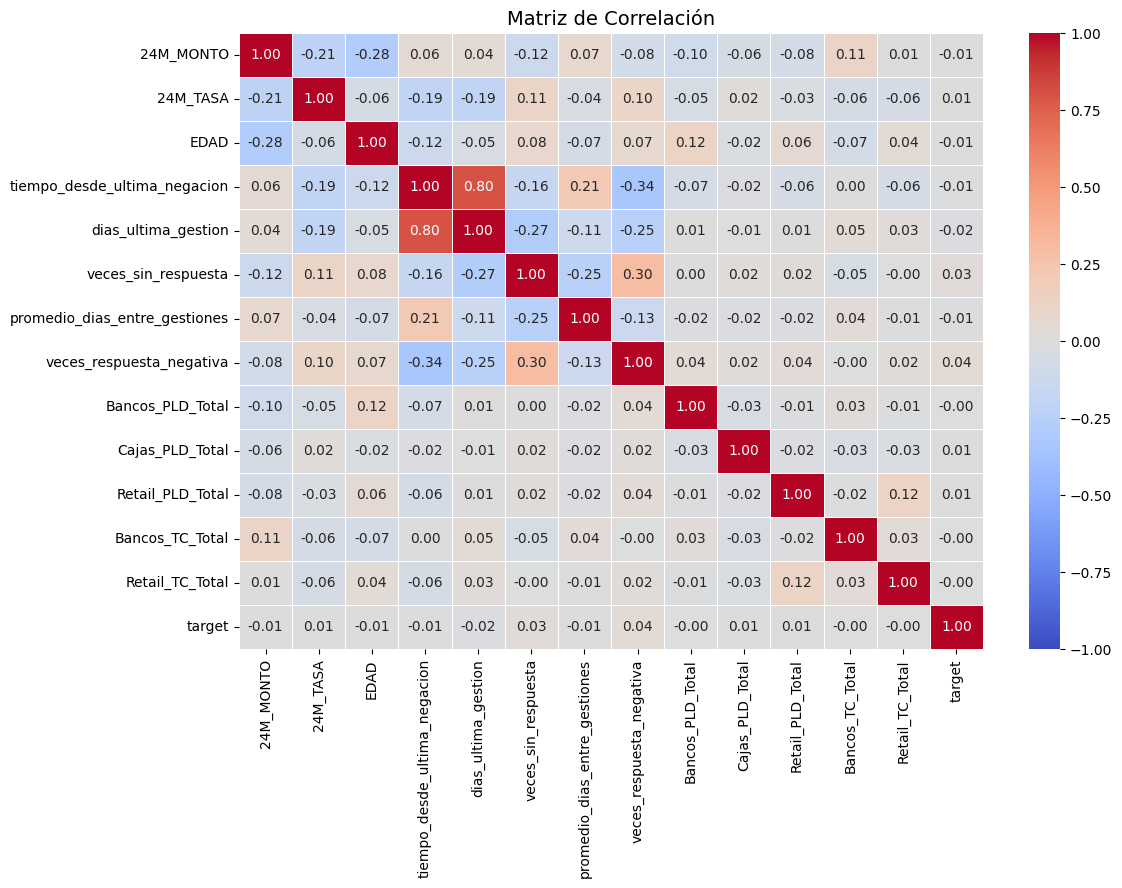

In [117]:
corr_matrix = data[[
    '24M_MONTO',
    '24M_TASA',
 'EDAD',
 'tiempo_desde_ultima_negacion',
 #'intentos_totales',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
# 'max_intentos_en_un_mes',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
# 'PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total',
# 'TC_Total'
]+["target"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()

In [118]:
col_independientes = list(corr_matrix.columns)[:-1]

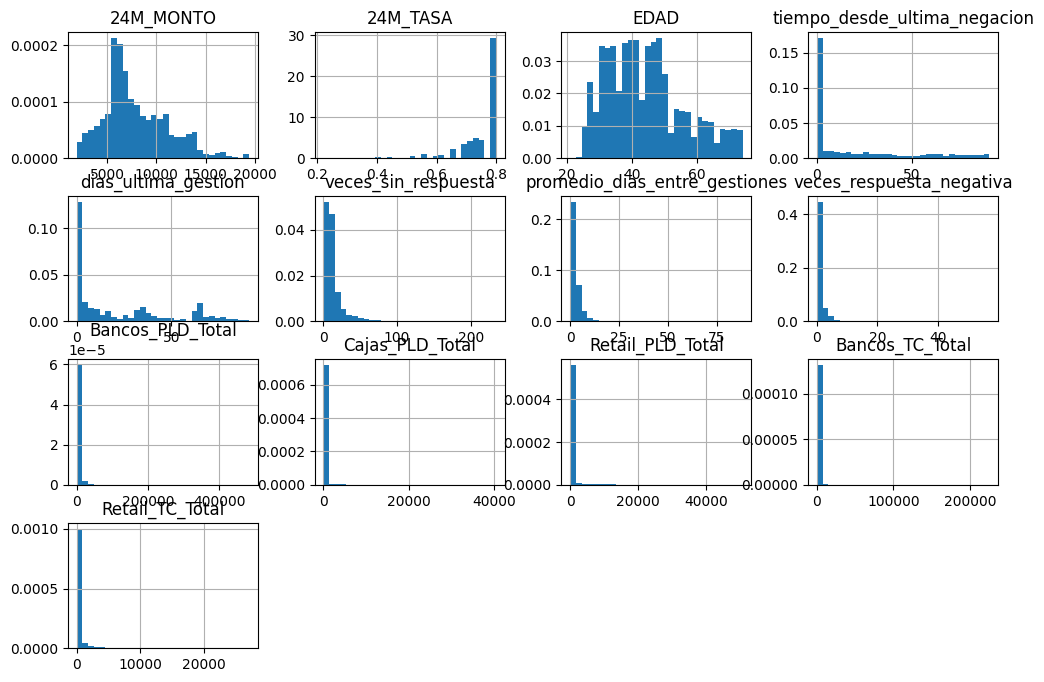

In [122]:
data[col_independientes].hist(bins=30, figsize=(12,8), density=True)
plt.show()

Las variables no están distribuidas normalmente. Y hay algunas en particular que están extremadamente sesgadas como Retail_TC_Total, Bancos_TC_Total, Retail_PLD_Total, Cajas_PLD_Total, Bancos_PLD_Total, veces_respuesta_negativa, promedio_dias_entre_gestiones, veces_sin_respuesta

A veces, transformar las variables para mejorar la dispersión de los valores, mejora el rendimiento del modelo. Pero es poco probable que una transformación ayude a cambiar la distribución de las variables extremadamente sesgadas de manera drástica.

Podemos aplicar una transformación Yeo-Johnson a variables como 24M_MONTO, 24M_TASA, EDAD , y una transformación binaria a variables como Retail_TC_Total, Bancos_TC_Total, Retail_PLD_Total, Cajas_PLD_Total, Bancos_PLD_Total, veces_respuesta_negativa, promedio_dias_entre_gestiones, veces_sin_respuesta

Vamos a hacerlo.

In [123]:
col_independientes

['24M_MONTO',
 '24M_TASA',
 'EDAD',
 'tiempo_desde_ultima_negacion',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total']

In [124]:
# primero hagamos una lista con las variables extremadamente sesgadas
# para más adelante

skewed = [
  'tiempo_desde_ultima_negacion',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total']

In [125]:
# capturar las variables continuas restantes

cont_vars = [
'24M_MONTO',
 '24M_TASA',
 'EDAD',
]

### Yeo-Johnson transformation

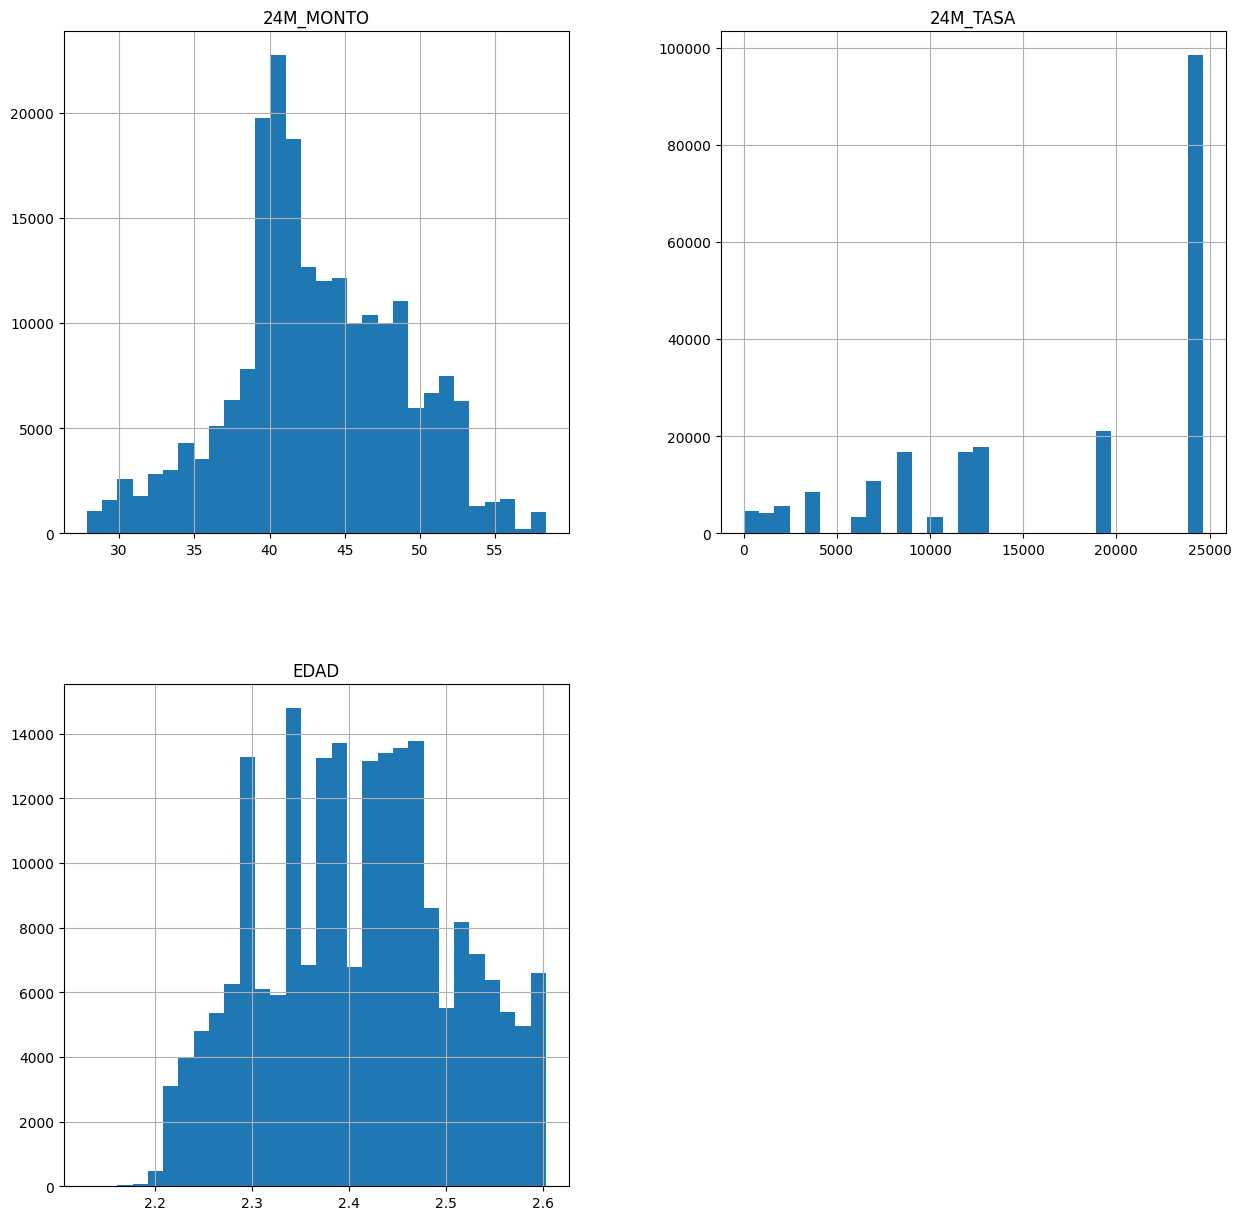

In [126]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

# Lista para almacenar variables problemáticas
problematic_vars = []

# Aplicar la transformación Yeo-Johnson a cada variable continua
for var in cont_vars:
    try:
        tmp[var], param = stats.yeojohnson(data[var])
    except Exception as e:
        print(f'Error al transformar la variable {var}: {e}')
        problematic_vars.append(var)

# Eliminar variables problemáticas de cont_vars
#cont_vars = [var for var in cont_vars if var not in problematic_vars]

# Graficar los histogramas de las variables transformadas
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

Para LotFrontage y MasVnrArea, la transformación no hizo un trabajo sorprendente.

Para las otras, los valores parecen estar distribuidos de manera más uniforme en el rango.

Si esto ayuda a mejorar el poder predictivo, está por verse. Para determinar si este es el caso, deberíamos entrenar un modelo con los valores originales y uno con los valores transformados, y determinar el rendimiento del modelo y la importancia de las características. Pero eso escapa del alcance de este curso.

Aquí, haremos una exploración visual rápida en su lugar:

A simple inspección visual sugiere que las transformaciones parecen mejorar la relación solo para LotArea.

Vamos a intentar una transformación diferente ahora. La mayoría de las variables contienen el valor 0, por lo que no podemos aplicar la transformación logarítmica, pero ciertamente podemos hacerlo para las siguientes variables:

["LotFrontage", "1stFlrSF", "GrLivArea"]

Así que hagamos eso y veamos si eso cambia la distribución de las variables y su relación con el objetivo.

 ### Logarithmic transformation

In [176]:
cont_vars

['24M_MONTO', '24M_TASA', 'EDAD']

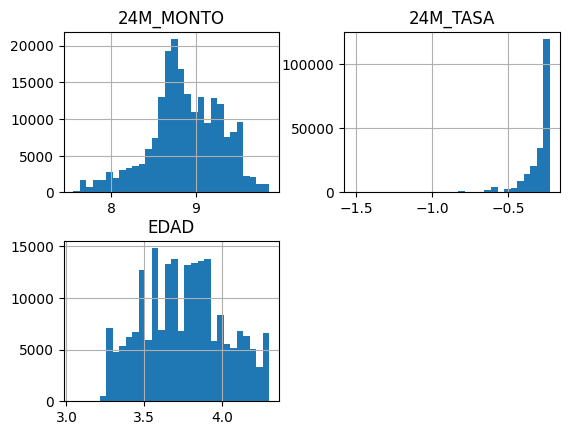

In [127]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = data.copy()

for var in cont_vars:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[cont_vars].hist(bins=30)
plt.show()

La distribución de las variables ahora parece más "gaussiana".

Vamos a evaluar su relación con el objetivo.

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], palette="coolwarm")
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp, x="target", y=var, ax=axes[i, 1], palette="coolwarm")
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], p

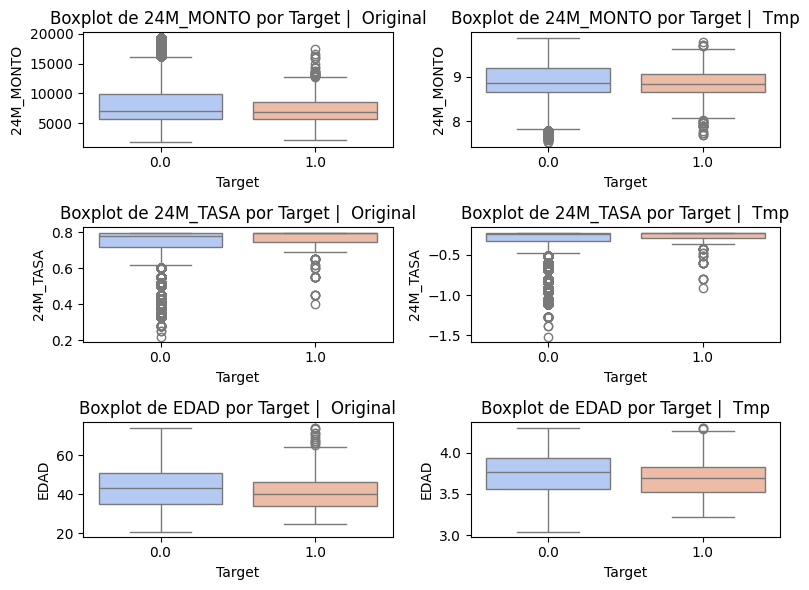

In [128]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship
import math
# Número de variables
num_vars = len(cont_vars)
num_cols = 2  # KDE a la izquierda, Boxplot a la derecha
num_rows = math.ceil(num_vars)  # Una fila por variable

# Crear subgráficos (KDE en la primera columna, Boxplot en la segunda)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 2 * num_rows))

for i, var in enumerate(cont_vars):
    # KDE a la izquierda
    sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], palette="coolwarm")
    axes[i, 0].set_title(f"Boxplot de {var} por Target |  Original")
    axes[i, 0].set_xlabel("Target")
    axes[i, 0].set_ylabel(var)

    # Boxplot a la derecha
    sns.boxplot(data=tmp, x="target", y=var, ax=axes[i, 1], palette="coolwarm")
    axes[i, 1].set_title(f"Boxplot de {var} por Target |  Tmp")
    axes[i, 1].set_xlabel("Target")
    axes[i, 1].set_ylabel(var)

plt.tight_layout()
plt.show()

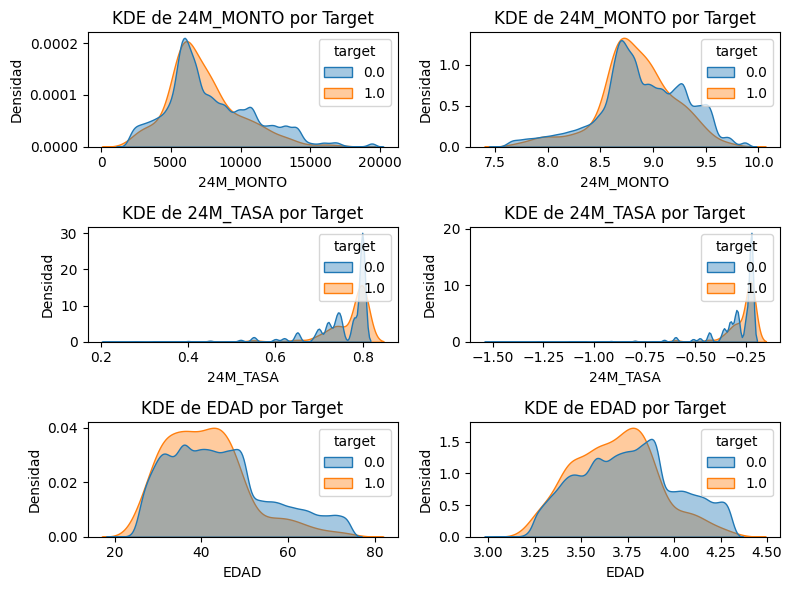

In [129]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

# Número de variables
num_vars = len(cont_vars)
num_cols = 2  # KDE a la izquierda, Boxplot a la derecha
num_rows = math.ceil(num_vars)  # Una fila por variable

# Crear subgráficos (KDE en la primera columna, Boxplot en la segunda)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 2 * num_rows))

for i, var in enumerate(cont_vars):
    # KDE a la izquierda
    sns.kdeplot(data=data, x=var, hue="target", common_norm=False, fill=True, alpha=0.4, ax=axes[i, 0])
    axes[i, 0].set_title(f"KDE de {var} por Target")
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel("Densidad")
    
    sns.kdeplot(data=tmp, x=var, hue="target", common_norm=False, fill=True, alpha=0.4, ax=axes[i, 1])
    axes[i, 1].set_title(f"KDE de {var} por Target")
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel("Densidad")


plt.tight_layout()
plt.show()

Las variables transformadas tienen una mejor dispersión de los valores, lo que a su vez puede ayudar a hacer mejores predicciones.

## Skewed variables (Variables Sesgadas)

Vamos a transformarlas en variables binarias y ver cuán predictivas son:

In [175]:
skewed

['tiempo_desde_ultima_negacion',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total']

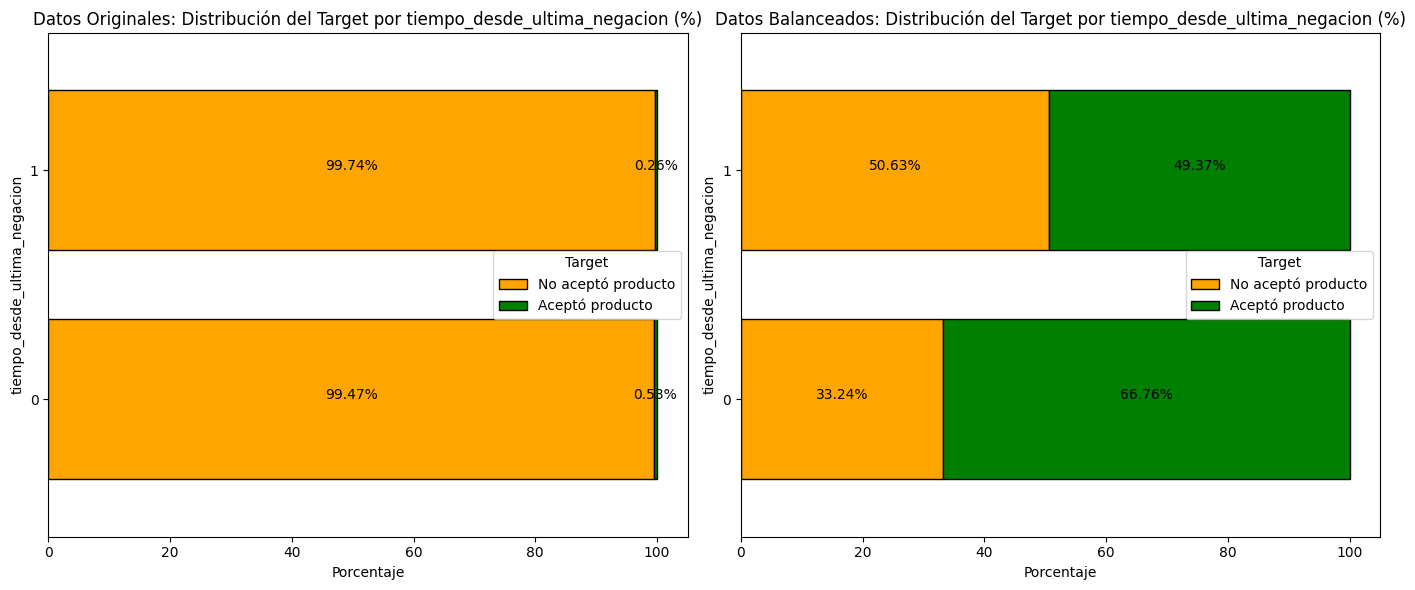

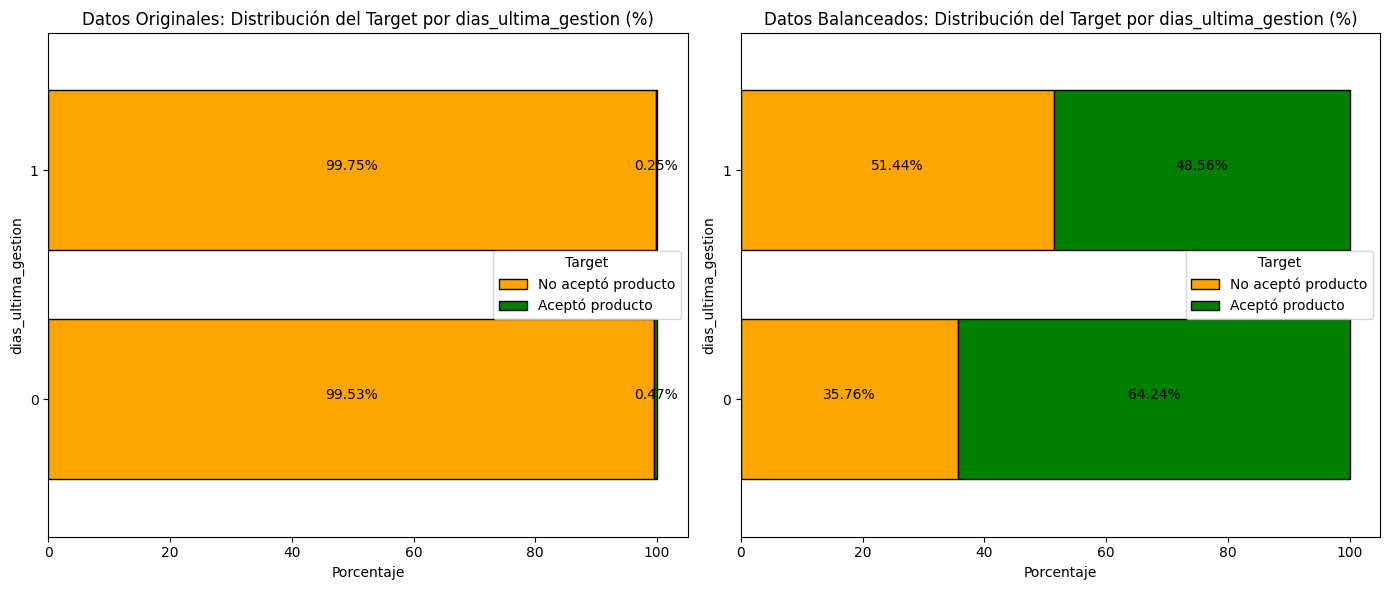

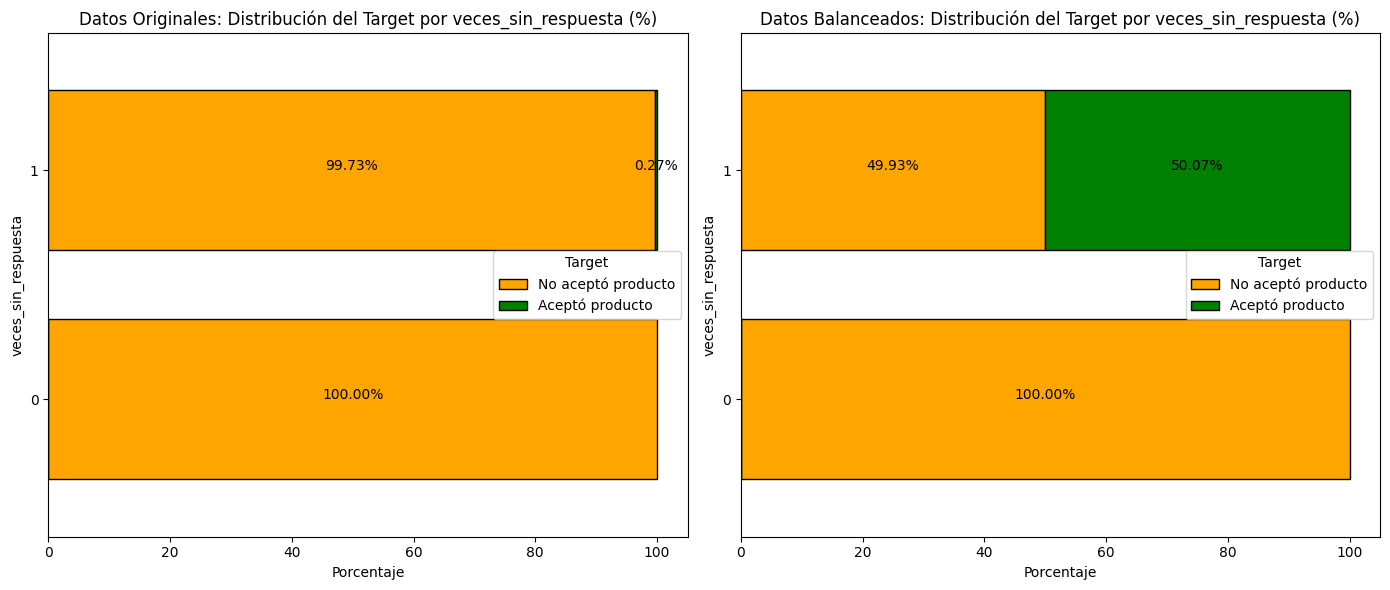

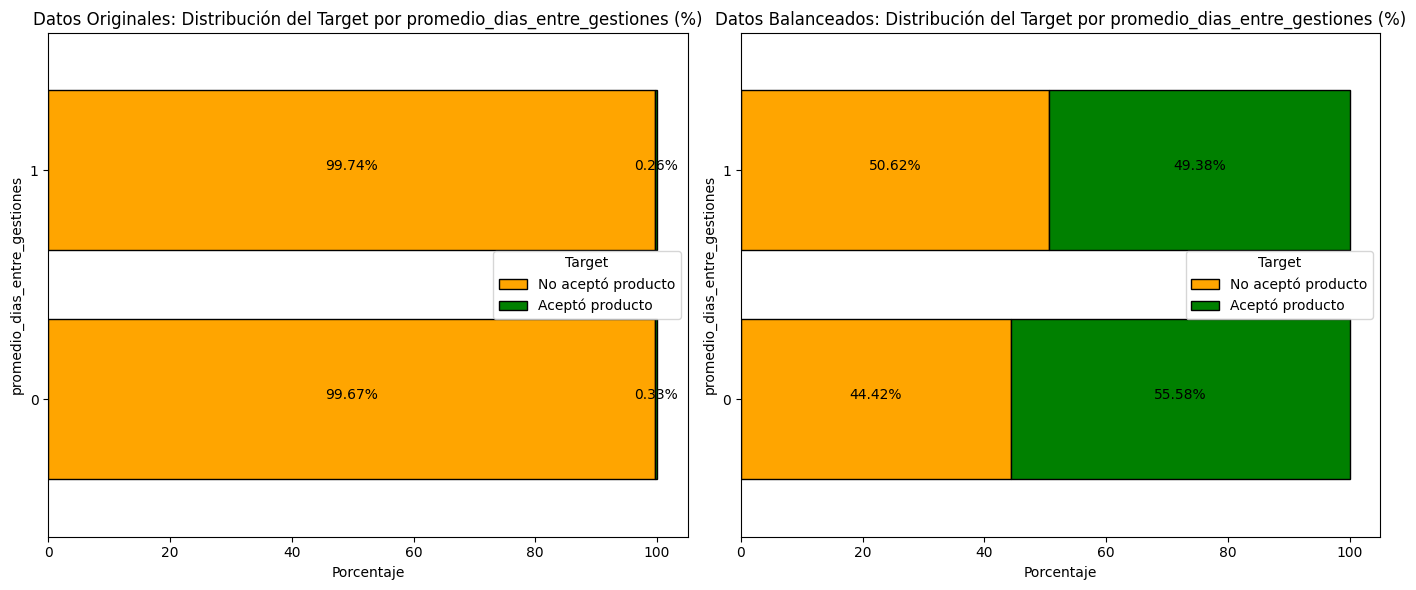

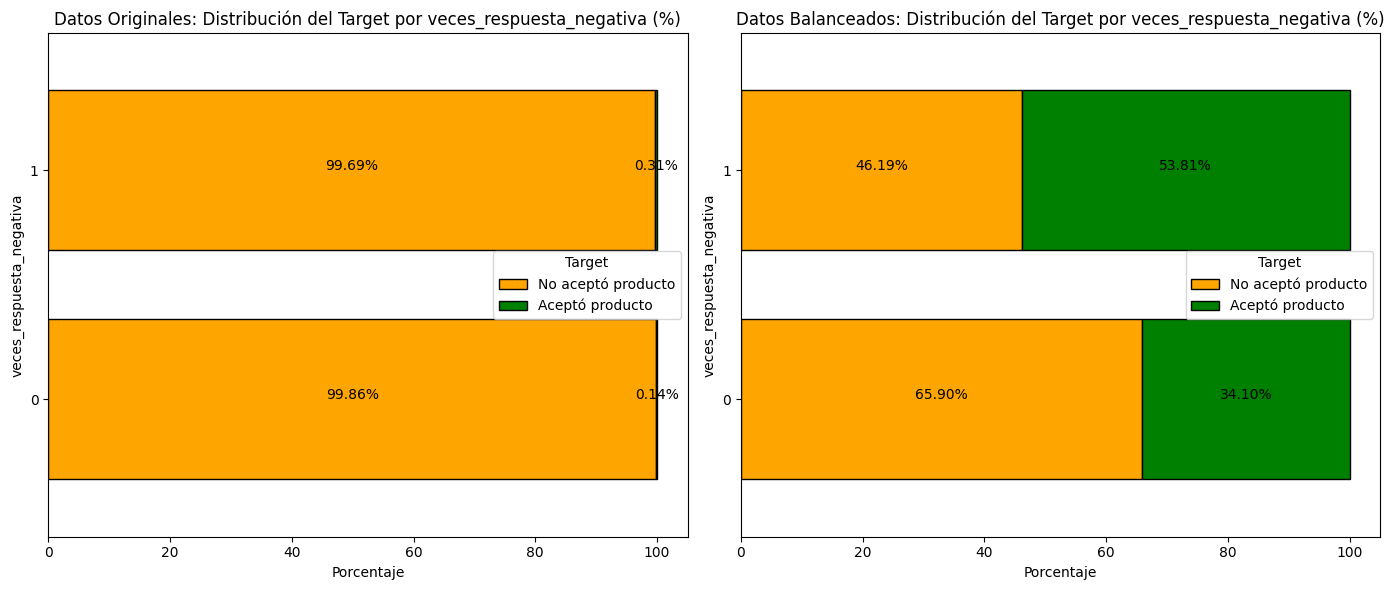

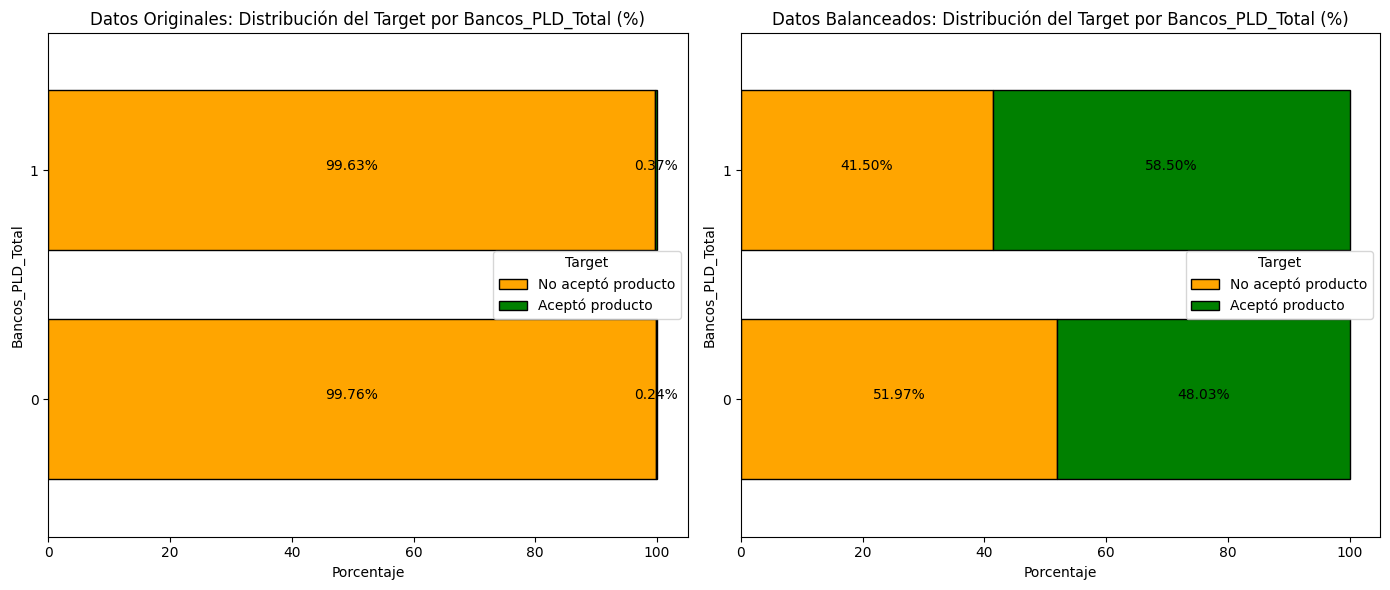

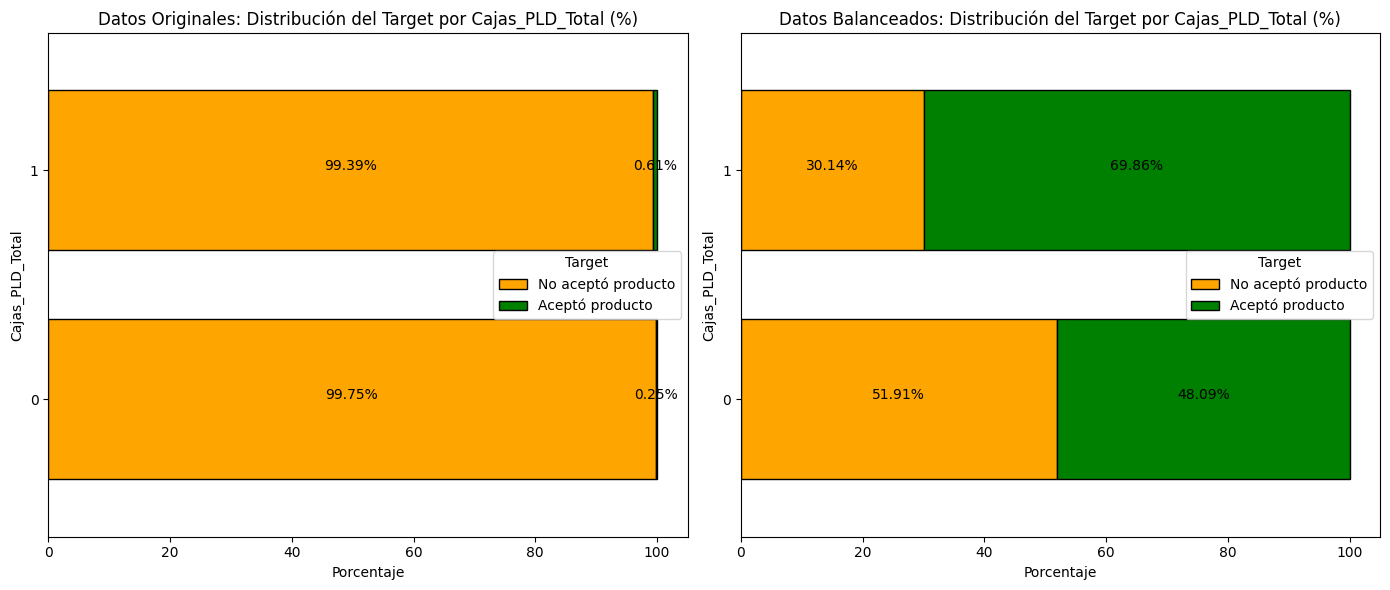

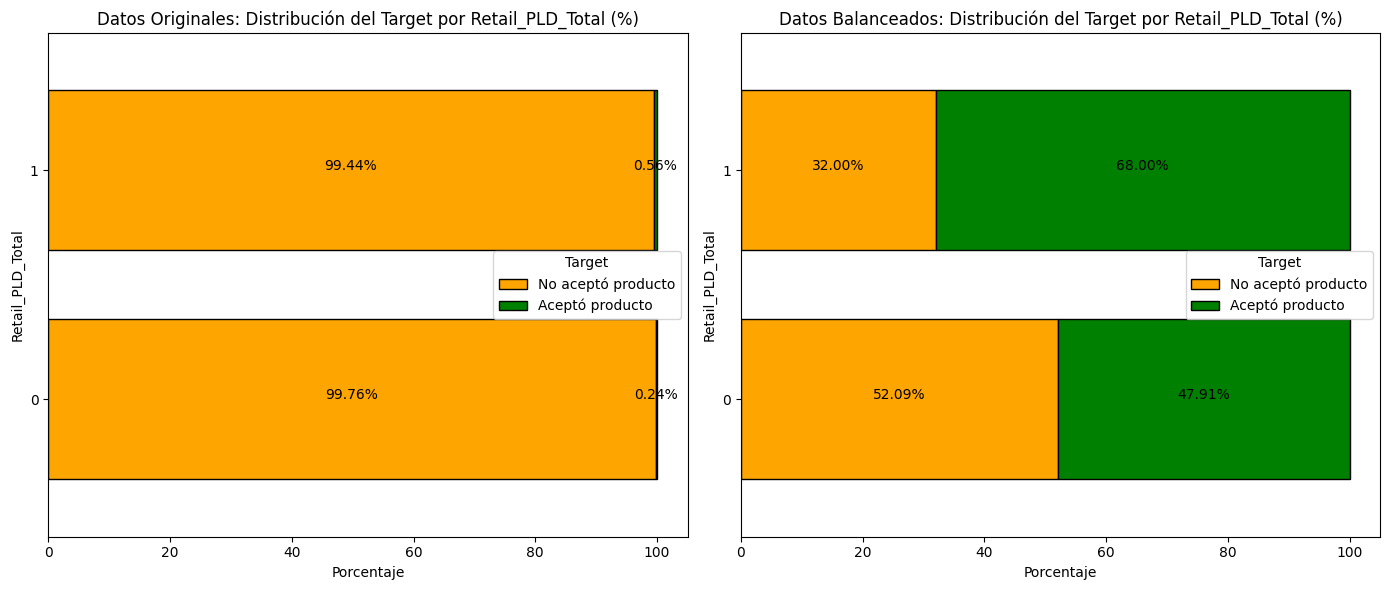

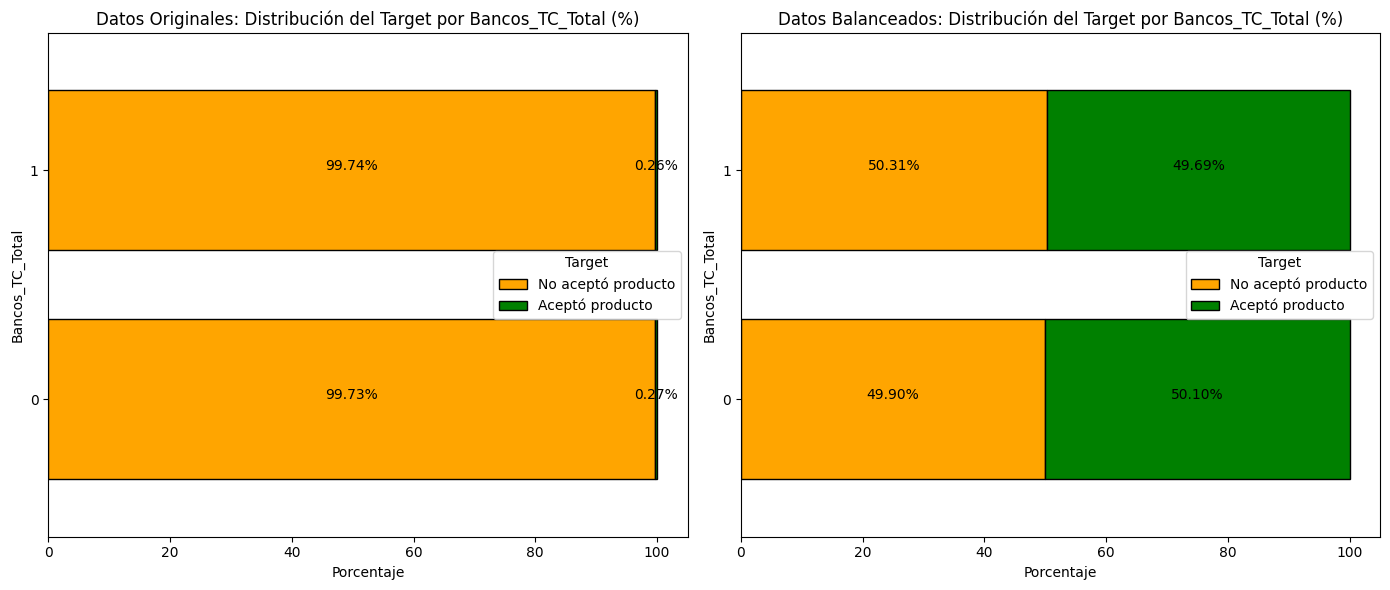

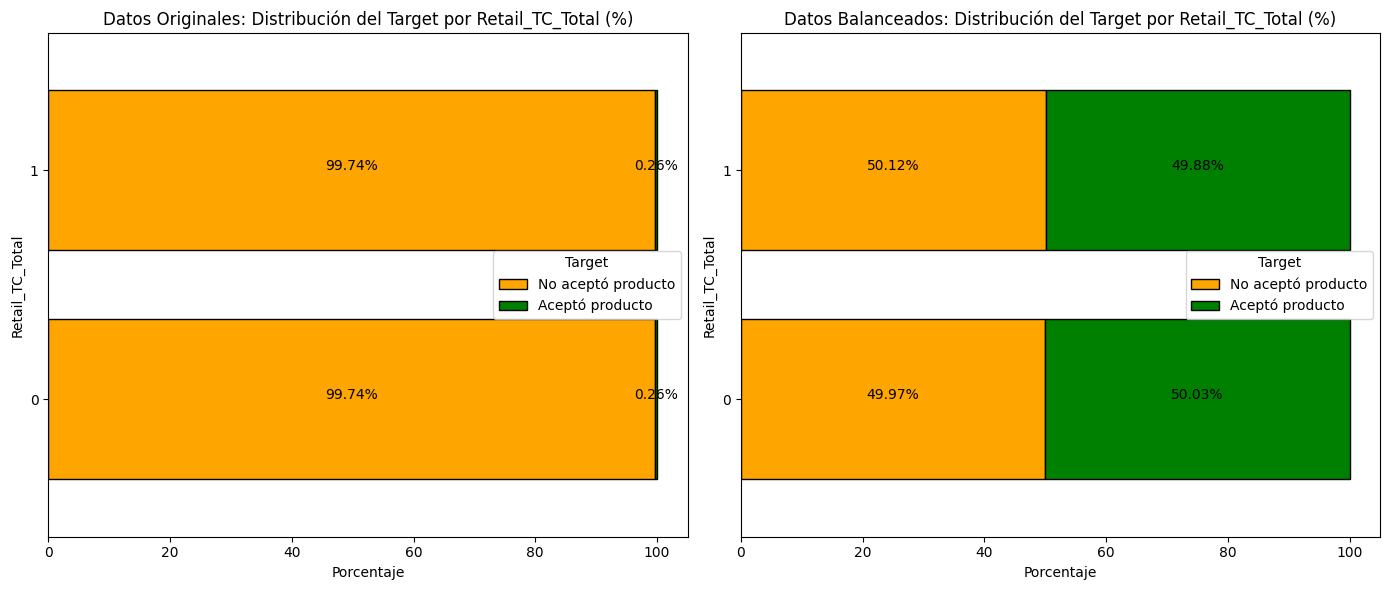

In [130]:
for var in skewed:

    tmp = data.copy()
    tmp_balanced = df_balanced.copy()

    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    tmp_balanced[var] = np.where(tmp_balanced[var]==0, 0, 1)
    

    barras_apiladas_target(tmp, tmp_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])

    plt.show()

Parece haber una diferencia en el precio de venta en los valores mapeados, pero los intervalos de confianza se superponen, por lo que probablemente esto no sea significativo ni predictivo.

# Categorical variables

Vamos a analizar las variables categóricas presentes en el conjunto de datos.

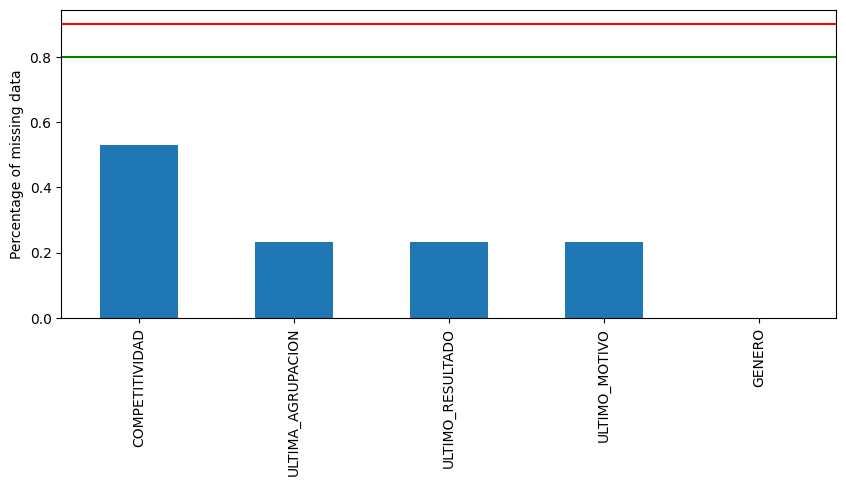

In [133]:
# plot
data[cat_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [131]:
print('Numero de Variables Categóricas: ', len(cat_vars))

Numero de Variables Categóricas:  17


In [140]:
import re
# Renombrar columnas eliminando caracteres especiales y reemplazando espacios por "_"

for columna in cat_vars:
    data[columna] = [  "Missing" if col is None else re.sub(r'\W+', '_', col)  for col in data[columna] ]

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1001164361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna] = [  "Missing" if col is None else re.sub(r'\W+', '_', col)  for col in data[columna] ]


In [172]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

KeyError: "['ESTADO_TASA', 'ESTADO_OFERTA', 'NUEVA_OFERTA'] not in index"

## Number of labels: cardinality

Evaluemos cuántas categorías diferentes están presentes en cada una de las variables.

<Axes: >

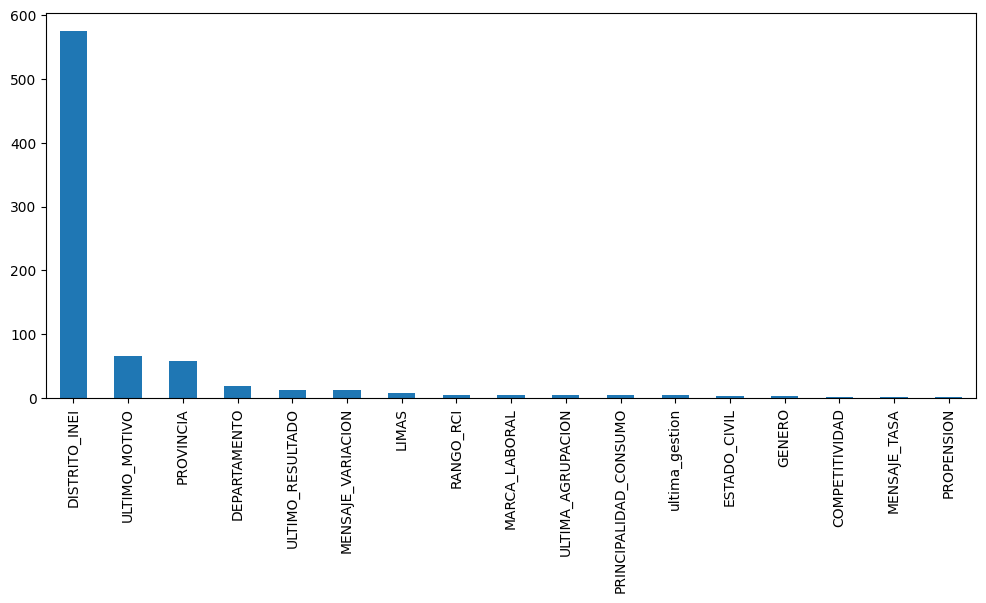

In [142]:
# we count unique categories with pandas unique()
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [173]:
cat_na

['COMPETITIVIDAD',
 'ULTIMA_AGRUPACION',
 'ULTIMO_RESULTADO',
 'ULTIMO_MOTIVO',
 'GENERO']

In [143]:
cat_vars = ['MARCA_LABORAL',
 'LIMAS',
 'PROPENSION',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'MENSAJE_VARIACION',
 'ULTIMA_AGRUPACION',
 'RANGO_RCI',
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion']

In [144]:
{x : int(x.split("_")[0]) for x in data["MARCA_LABORAL"].unique()}

{'2_DEPEN_INDEPEN': 2,
 '3_INDEPENDIENTE': 3,
 '1_DEPENDIENTE': 1,
 '4_INFORMAL': 4}

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1578944545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MARCA_LABORAL"] = data["MARCA_LABORAL"].map(map_MARCA_LABORAL)
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1578944545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PRINCIPALIDAD_CONSUMO"] = data["PRINCIPALIDAD_CONSUMO"].map(map_deuda_bancos)


In [174]:
num_na

['veces_acepto_producto',
 'tiempo_desde_ultima_conversion',
 'tiempo_desde_ultima_negacion',
 'intentos_totales',
 'meses_gestionados',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'veces_solicitud_seguimiento',
 'promedio_dias_entre_gestiones',
 'max_intentos_en_un_mes',
 'veces_respuesta_positiva',
 'veces_respuesta_negativa']

In [147]:
map_MARCA_LABORAL = {'2_DEPEN_INDEPEN': 1,
 '3_INDEPENDIENTE': 3,
 '1_DEPENDIENTE': 2,
 '4_INFORMAL': 4}
map_deuda_bancos = {"SIN_DEUDA_CONSUMO": 0 , "DEUDA_EN_CAJAS":3 , "DEUDA_EN_BANCOS_MEDIANOS":2 , "DEUDA_EN_BANCOS_GRANDES":1}
data["MARCA_LABORAL"] = data["MARCA_LABORAL"].map(map_MARCA_LABORAL)
data["PRINCIPALIDAD_CONSUMO"] = data["PRINCIPALIDAD_CONSUMO"].map(map_deuda_bancos)

data["PROPENSION"] = data["PROPENSION"].str.split("_").str[1]
data["RANGO_RCI"] = data["RANGO_RCI"].str.split("_").str[0]
data["ESTADO_CIVIL"] = data["ESTADO_CIVIL"].map({"Soltero":2,"Casado":1,"Missing":0 , "Otro":0})
data["ULTIMA_AGRUPACION"] = data["ULTIMA_AGRUPACION"].map({"NO GESTIONADO": 2 , "NO_CONTACTO": 0 , "CONTACTO_NO_EFECTIVO":1,"CONTACTO_EFECTIVO":1 , "Missing":2})
data["ultima_gestion"] = data["ultima_gestion"].map({"NO_GESTIONADO": 2 ,'Missing':2, "NO_CONTACTO": 0 , "CONTACTO_NO_EFECTIVO":1,"CONTACTO_EFECTIVO":1})
data["GENERO"] = data["GENERO"].map({"F":0,"M":1,"Missing":0})
data["ESTADO_TASA"] = data["MENSAJE_VARIACION"].map(lambda x : 2 if "MENOS_TASA" in x else ( 1 if "MISMA_TASA" in x else ( 3 if "NUEVA" in x else 0 ) ))
data["ESTADO_OFERTA"] = data["MENSAJE_VARIACION"].map(lambda x : 0 if "MENOS_OFERTA" in x else ( 1 if "MISMA_OFERTA" in x else ( 3 if "NUEVA" in x else 2 ) ))
data["NUEVA_OFERTA"] = data["MENSAJE_VARIACION"].map(lambda x : 1 if "NUEVA" in x else 0)
data["COMPETITIVIDAD"] = data["COMPETITIVIDAD"].map(lambda x : 0 if x =='Missing' else 1)

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\538679959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PROPENSION"] = data["PROPENSION"].str.split("_").str[1]
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\538679959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RANGO_RCI"] = data["RANGO_RCI"].str.split("_").str[0]
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\538679959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [161]:
cat_vars= ['MARCA_LABORAL',
 
 'PROPENSION',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'ULTIMA_AGRUPACION',
 
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion',
          'RANGO_RCI','LIMAS'] + ["ESTADO_TASA","ESTADO_OFERTA","NUEVA_OFERTA"]

In [162]:
df_balanced = balanced_resampling(data, fact =  1, replace=True)


Distribución después del balanceo: Counter({0.0: 210940, 1.0: 210940})


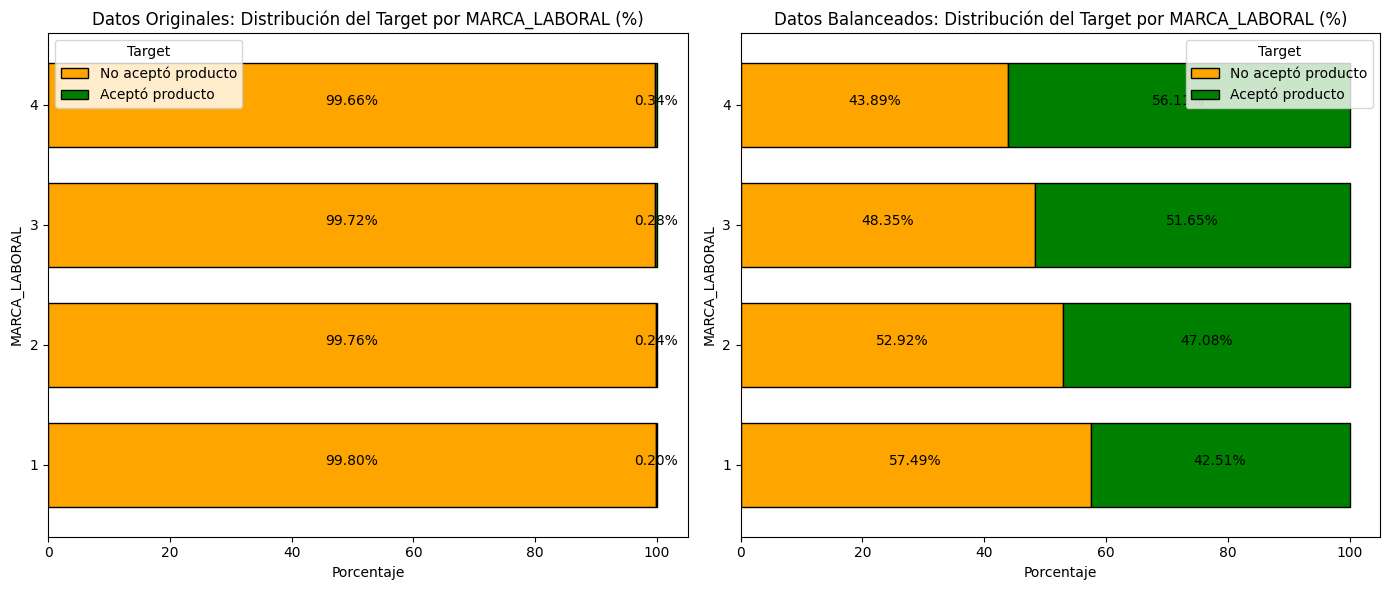

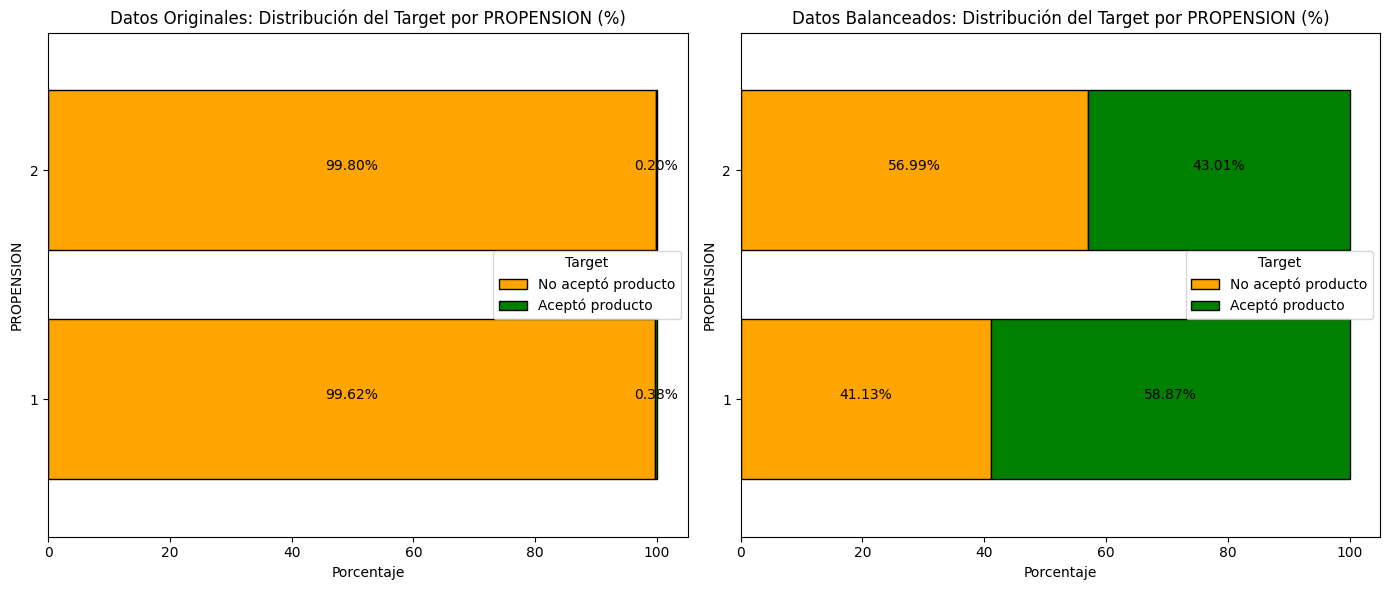

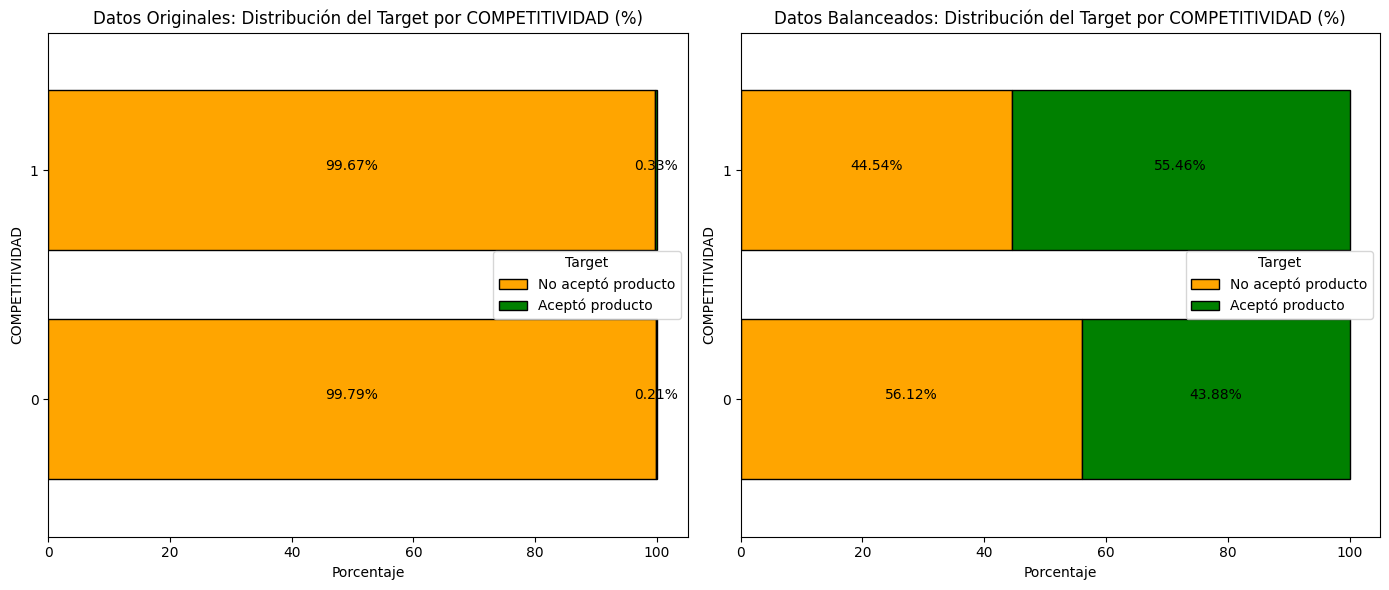

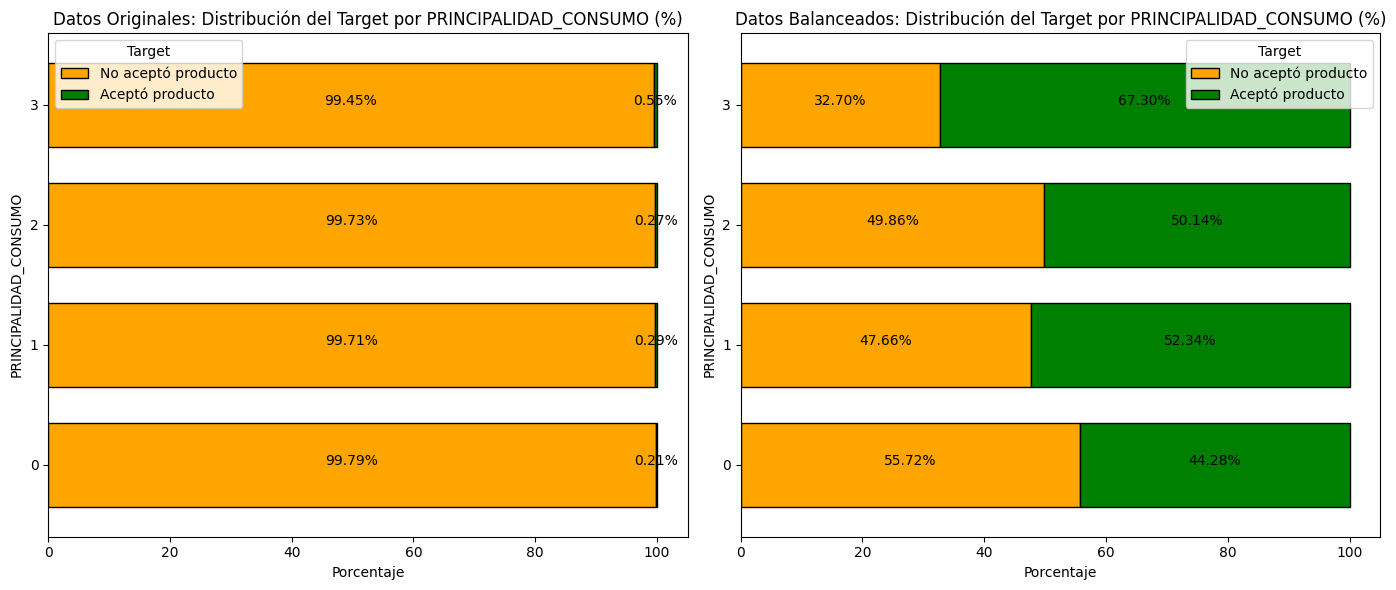

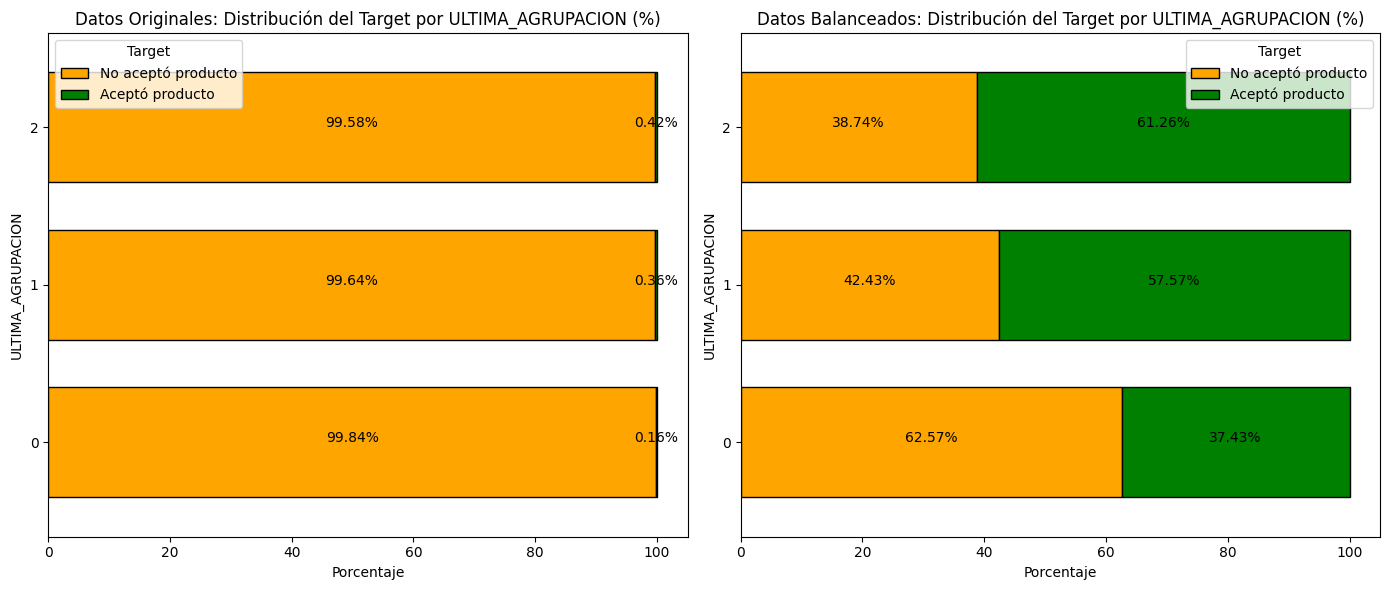

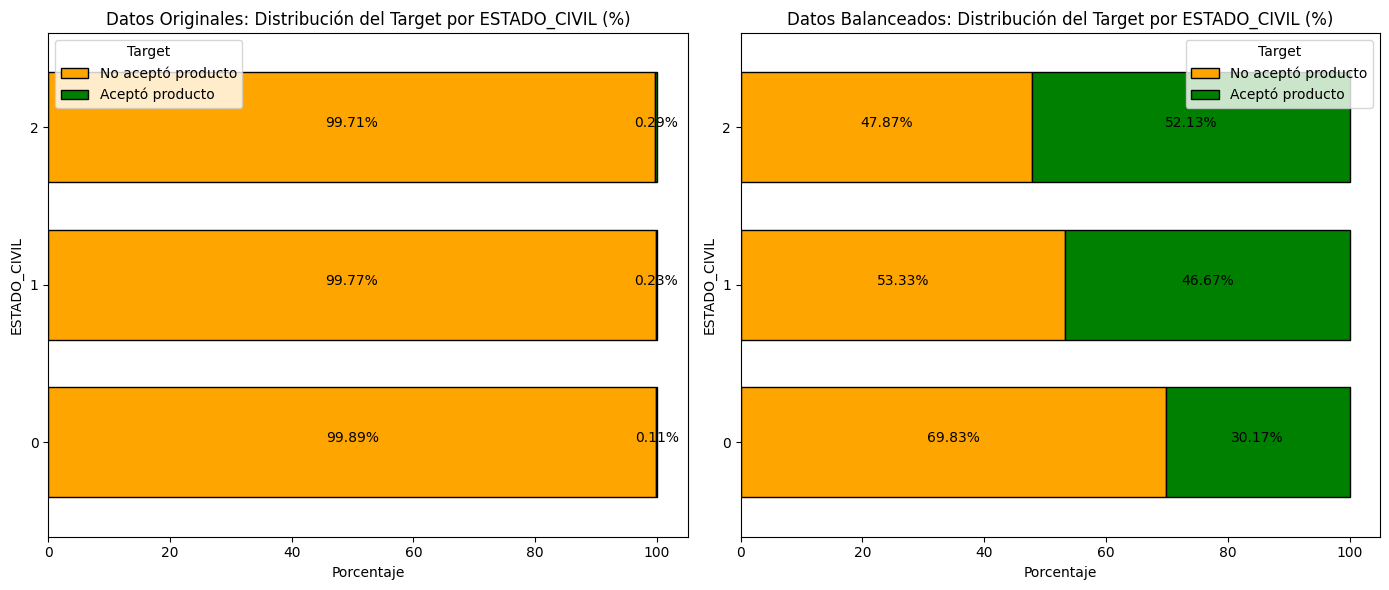

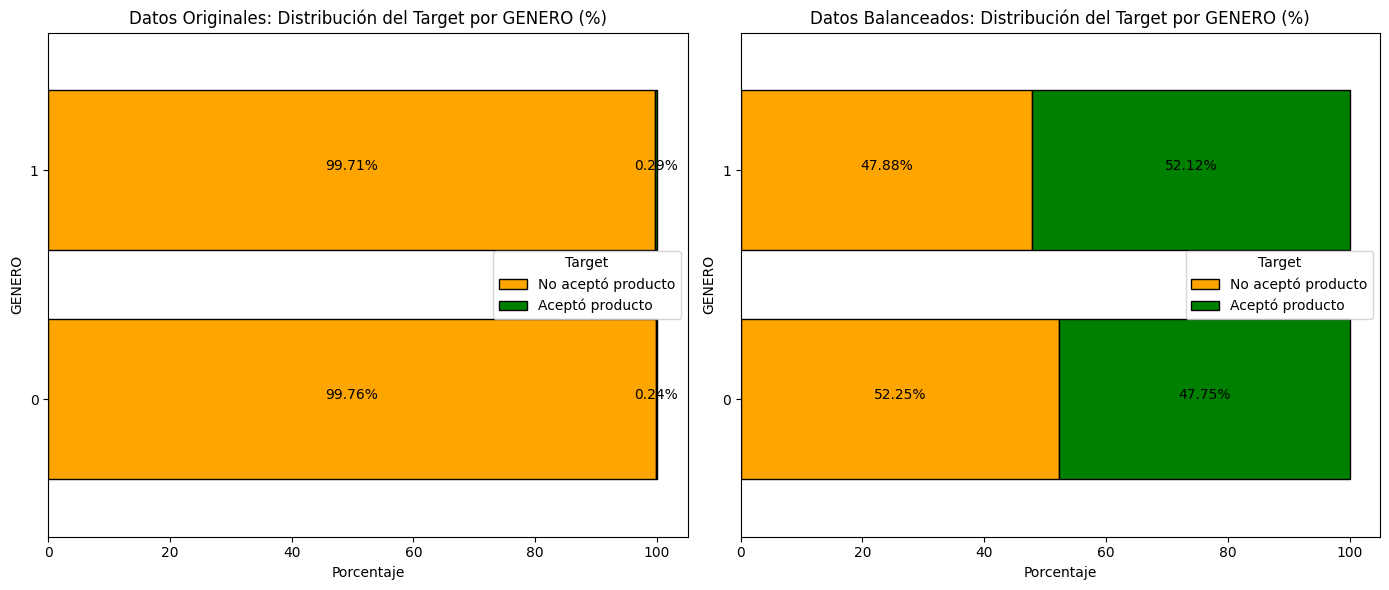

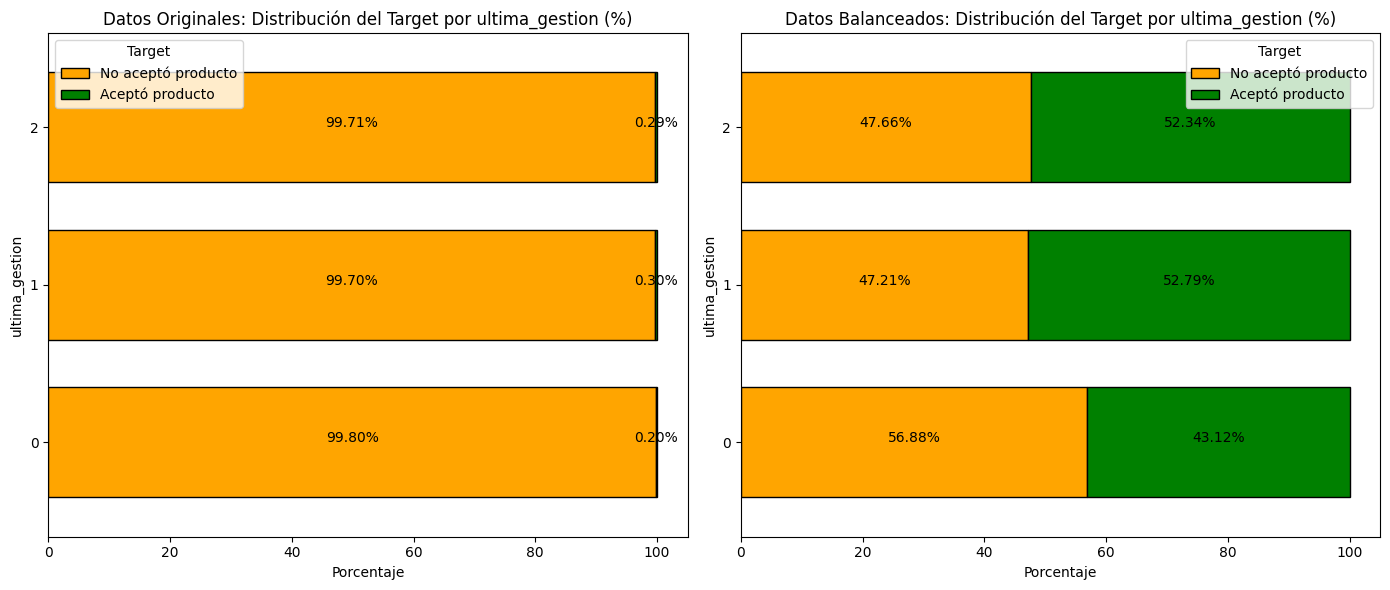

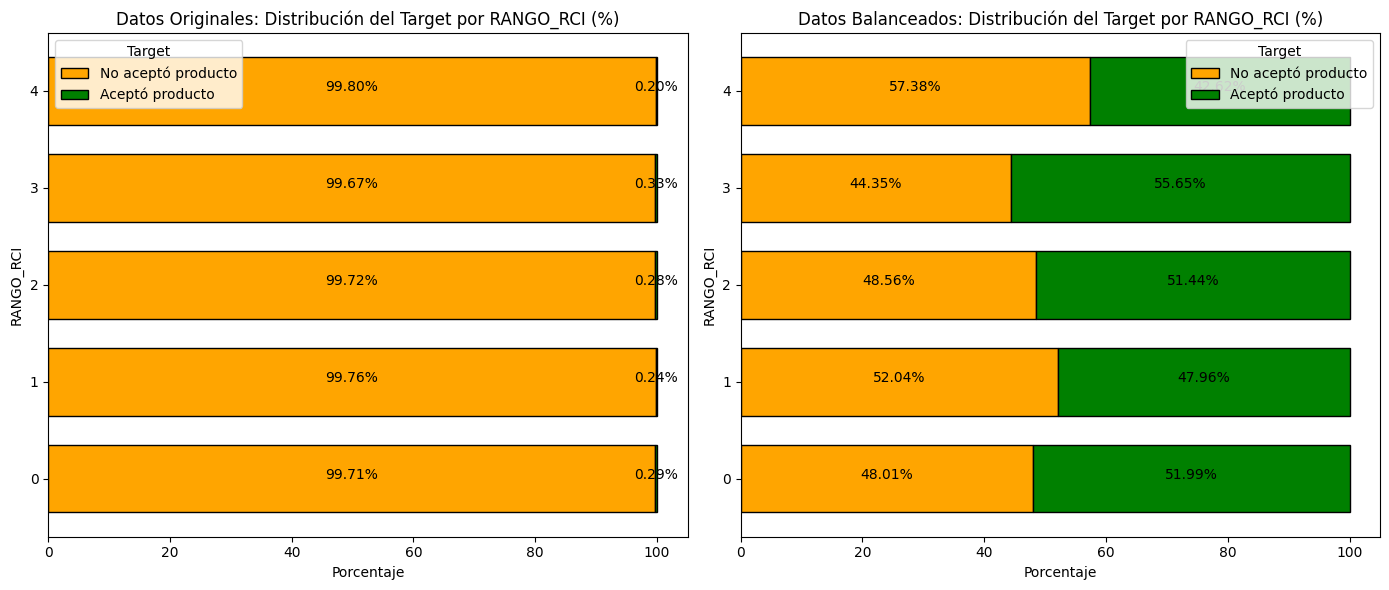

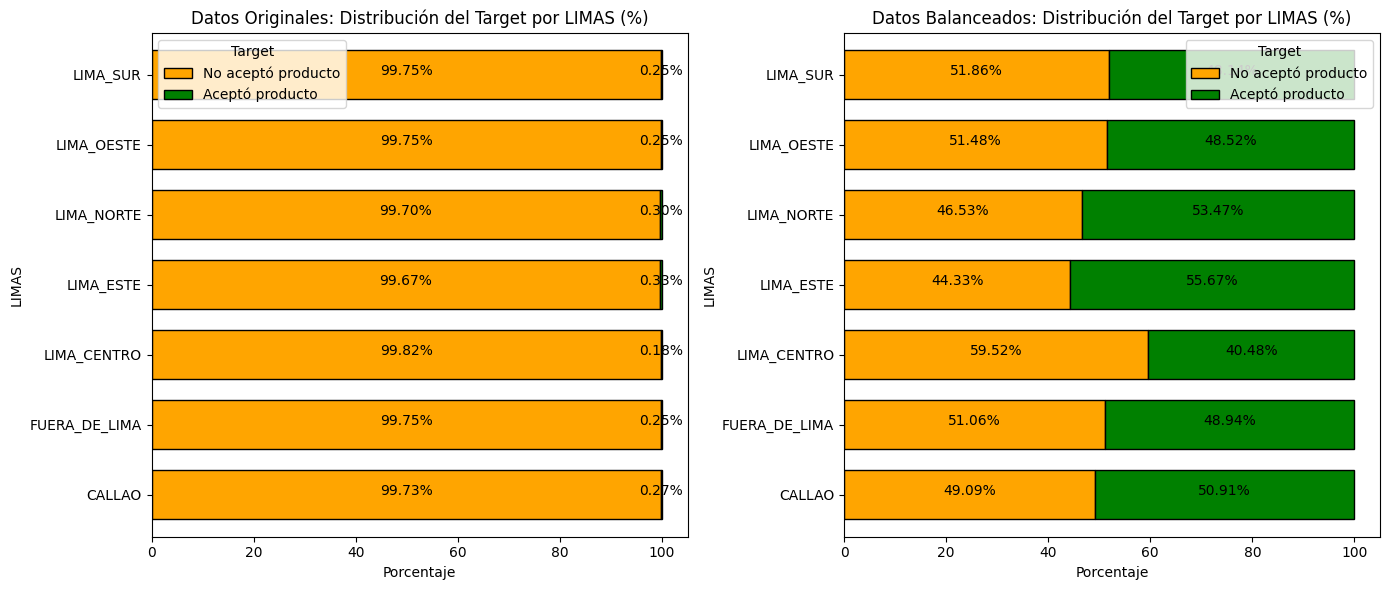

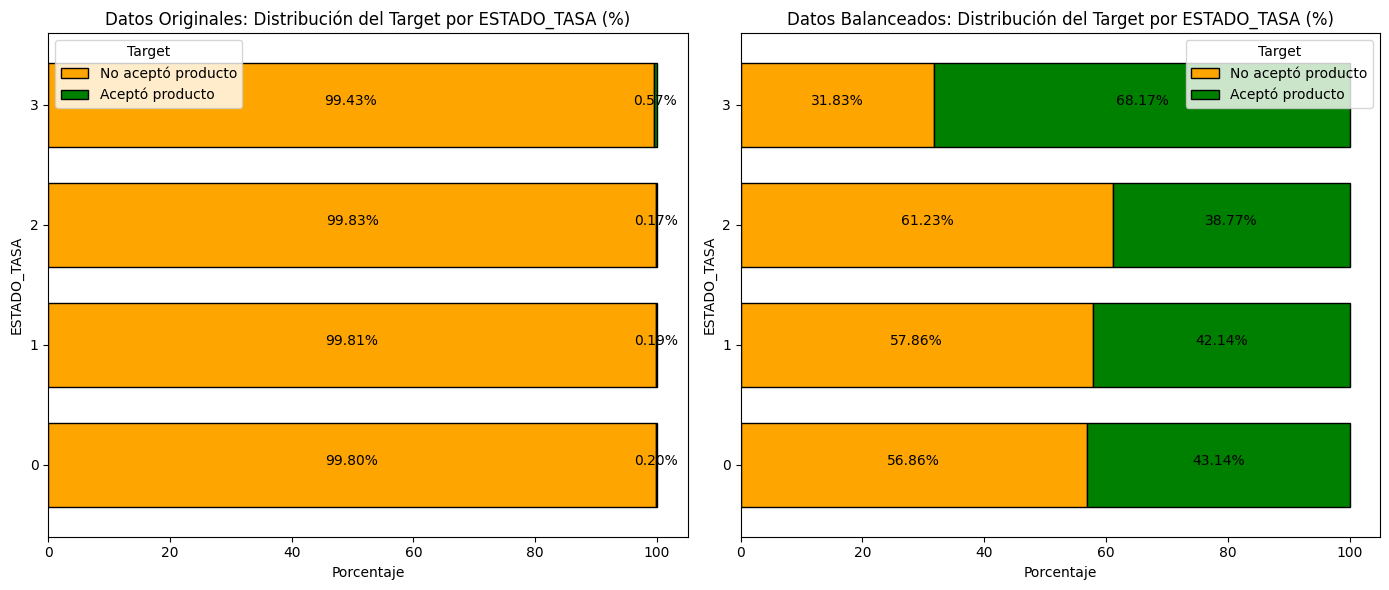

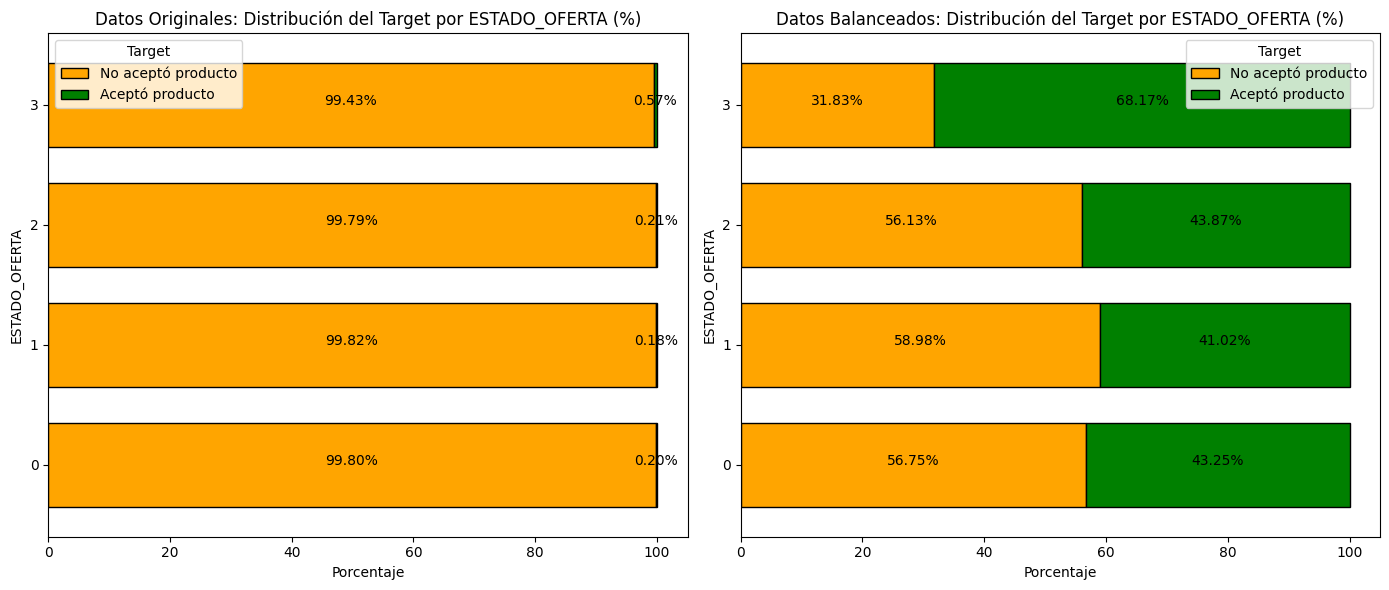

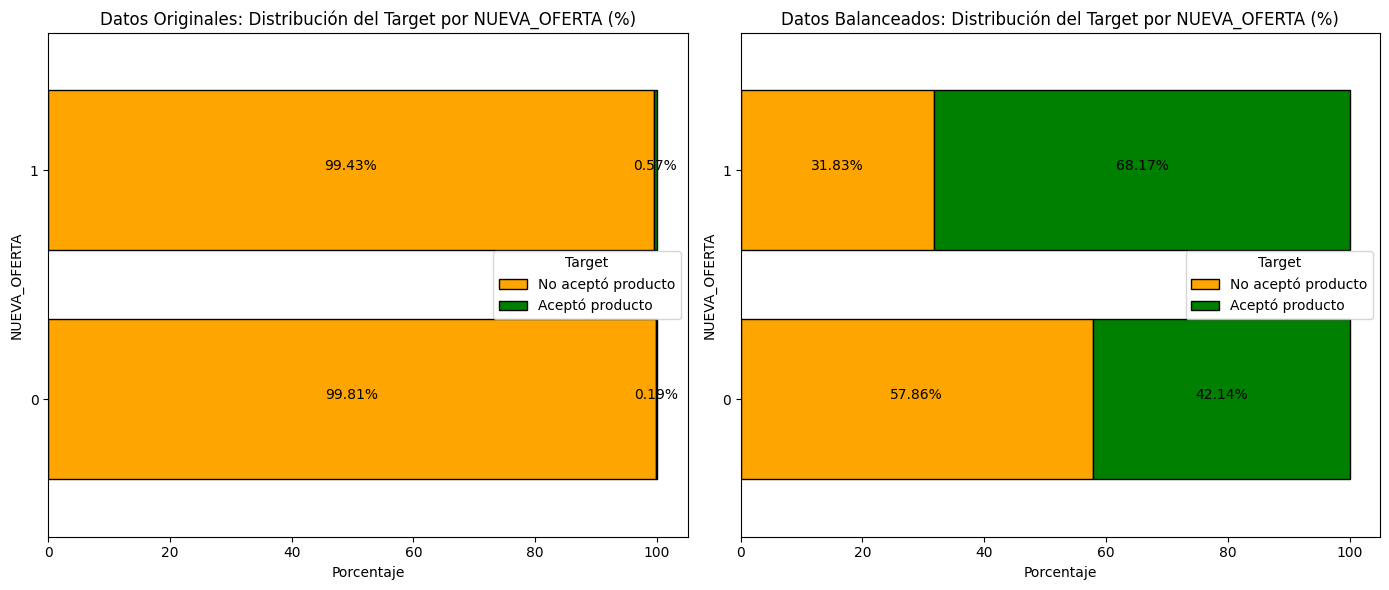

In [163]:
for var in cat_vars:

    tmp = data.copy()
    tmp_balanced = df_balanced.copy()
    barras_apiladas_target(tmp, tmp_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])

    plt.show()

Para la mayoría de los atributos, el aumento en el precio de la casa con el valor de la variable es bastante claro.

In [ ]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(vars_with_na + ["target"], axis=1), # predictive variables
    data['target'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

In [ ]:

# to build the models
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train = X_train.select_dtypes([float,int])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Entrenar modelo Lasso para selección de variables
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', C=0.01)
lasso_clf.fit(X_scaled, y_train)

# Seleccionar las variables con coeficientes distintos de 0
selector = SelectFromModel(lasso_clf, prefit=True)
X_selected = selector.transform(X_scaled)

# Variables seleccionadas
selected_features = np.where(selector.get_support())[0]
print("Variables seleccionadas:", selected_features)

In [ ]:
features = [  '36M_MONTO', '36M_TASA', 'EDAD', 'veces_acepto_producto',
       'meses_gestionados', 'veces_sin_respuesta',
       'veces_solicitud_seguimiento', 'promedio_dias_entre_gestiones',
       'max_intentos_en_un_mes', 'veces_respuesta_positiva',
       'veces_respuesta_negativa', '_merge_variables', 'Bancos_PLD_Total',
       'Cajas_PLD_Total', 'Retail_PLD_Total', 'Retail_TC_Total', 'TC_Total',
       'Bancos_PLD_Entidades', 'Retail_PLD_Entidades', 'PLD_Entidades',
       'Retail_TC_Entidades', 'TC_Entidades', 'CANTIDAD_CELULARES']

In [ ]:
# Imprimamos el número de características totales y seleccionadas

# Así es como podemos hacer una lista de las características seleccionadas
selected_feats = X_train.columns[(sel_.get_support())]

# Imprimamos algunas estadísticas
print('Número de Features en Total: {}'.format((X_train.shape[1])))
print('Número de Features Seleccionados: {}'.format(len(selected_feats)))
print('Características con coeficientes reducidos a cero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

In [ ]:
# reduce the train and test set to the selected features

X_train = X_train[features] #Este tiene ahorita 36 caracteristicas
X_test = X_test[features] 

In [ ]:
import sys
print(sys.executable)


In [ ]:

# import RegressionExperiment and init the class
from pycaret.regression  import RegressionExperiment
ExperimentoRegresion = RegressionExperiment() #Instanciamos la clase

In [ ]:
data.target

In [ ]:
import re

# Renombrar columnas eliminando caracteres especiales y reemplazando espacios por "_"
data.columns = [re.sub(r'\W+', '_', col) for col in data.columns]
data.columns = [re.sub(r'\W+', '_', col).lower() for col in data.columns]


In [ ]:
if len(data.columns) != len(set(data.columns)):
    print("⚠️ Hay nombres de columnas duplicados. Revisa el dataset.")


In [ ]:
for col in data.select_dtypes(["O"]).columns:
    data[col] = data[col].map(lambda col :re.sub(r'\W+', '_', str(col)) )


In [ ]:

from pycaret.classification import *
clf1 = setup(data = data.reset_index(drop=True), target = 'cctarget', feature_selection = True)

In [ ]:
# 1. Entrenar un modelo (por ejemplo, LightGBM)
modelo = create_model('lightgbm')

# 2. Graficar importancia de variables
plot_model(modelo, plot='feature')


In [ ]:
selected_features = clf1.X.columns
print("📌 Variables seleccionadas por Feature Selection:")
print(list(selected_features))


In [ ]:
plot_model(clf1, plot='feature')


In [ ]:
plot_model(estimator='feature', top=20)


In [ ]:
plot_model(estimator='feature')


In [ ]:
original_features = list(data.columns)
removed_features = list(set(original_features) - set(selected_features))

print("❌ Variables eliminadas:")
print(removed_features)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")


# Número de variables
num_vars = len(col_independientes)
num_cols = 2  # KDE a la izquierda, Boxplot a la derecha
num_rows = math.ceil(num_vars)  # Una fila por variable

# Crear subgráficos (KDE en la primera columna, Boxplot en la segunda)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 2 * num_rows))

for i, var in enumerate(col_independientes):
    # KDE a la izquierda
    sns.kdeplot(data=data, x=var, hue="target", common_norm=False, fill=True, alpha=0.4, ax=axes[i, 0])
    axes[i, 0].set_title(f"KDE de {var} por Target")
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel("Densidad")

    # Boxplot a la derecha
    sns.boxplot(data=data, x="target", y=var, ax=axes[i, 1], palette="coolwarm")
    axes[i, 1].set_title(f"Boxplot de {var} por Target")
    axes[i, 1].set_xlabel("Target")
    axes[i, 1].set_ylabel(var)

plt.tight_layout()
plt.show()
